**Análise - Índice Small Caps**

**Variáveis Utilizadas**:

* **close**: preço de fechamento da ação

* **avg10**: média móvel de 10 dias (indicador de tendência do comportamento do preço da ação no período de 10 dias).

* **avg20**: média móvel de 20 dias (indicador de tendência do comportamento do preço da ação no período de 20 dias).

* **std10**: desvio padrão de 10 dias (indicador de volatilidade do comportamento do preço da ação no período de 10 dias).

* **std20**: desvio padrão de 20 dias (indicador de volatilidade do comportamento do preço da ação no período de 20 dias).

* **rsi14**: índice de força relativa de 14 dias (indicador de momento => sinaliza a velocidade com que os preços se alteram no período de 14 dias). Mostra o enfraquecimento e até reversão de uma tendência durante 14 dias. Funciona com uma linha entre 0 e 100. Quanto mais próximo de 100, mais força está perdendo a força compradora.

* **rsi5**: índice de força relativa de 5 dias (indicador de momento => sinaliza a velocidade com que os preços se alteram no período de 5 dias).

* **macd1226**: média móvel convergente divergente (indicador de tendências significativas a curto prazo). Corresponde à diferença entre média móvel de 12 dias (média de movimentações mais rápidas) e média móvel de 26 dias (média de movimentações mais lentas). Mostra o ganho entre a divergência entre as médias móveis.

* **signal9**: média movel exponencial do macd1226 no período de 9 dias (ajuda a identificar reversões de tendência e marcar os pontos ideais de entrada e saída).

* **histogram9**: diferença entre a linha de macd1226 e a linha de signal9 (representação gráfica da convergência e da divergência das linhas macd1226 e signal9).

* **macd0720**: média móvel convergente divergente (indicador de tendências significativas a curto prazo). Corresponde à diferença entre média móvel de 7 dias (média de movimentações mais rápidas) e média móvel de 20 dias (média de movimentações mais lentas). Mostra o ganho entre a divergência entre as médias móveis.

* **signal5**: média movel exponencial do macd0720 no período de 5 dias (ajuda a identificar reversões de tendência e marcar os pontos ideais de entrada e saída).

* **histogram5**: diferença entre a linha de macd0720 e a linha de signal5 (representação gráfica da convergência e da divergência das linhas macd0720 e signal5).

* **bbands**: Bandas de Bollinger (indicador de volatilidade). As bandas são derivadas das médias móveis e mostram que, independente de qualquer movimento que o preço faça, ele tende a voltar a um equilíbrio. 

Uma linha MACD de valor positivo indica que a MME menor está acima da MME maior. Quanto mais distante a MME menor estiver da maior, maior será o aumento no valor positivo da linha MACD. Isso é um sinal de um momentum de alta crescente. Por outro lado, um MACD negativo indica que a MME menor está abaixo da maior. Mais uma vez, os valores negativos aumentam à medida em que as duas linhas divergem ainda mais. Nesse caso, temos um momentum de baixa crescente.

# Etapa 1: Overview

## 1. Importação dos dados

In [1]:
# Biblioteca(s) Necessária(s)
library(readxl)

In [2]:
# Dados do Índice de Sustentabilidade Empresarial
smll <- read_excel("smll.xlsx",
                   col_types = c("date", "numeric", "numeric", "numeric", "numeric", "numeric",
                                 "numeric", "numeric", "numeric", "numeric", "numeric", "numeric",
                                 "numeric", "numeric", "numeric"))
print(smll)

# A tibble: 3,817 x 15
   data                close avg10 avg20 std10 std20 rsi14  rsi5 macd1226
   <dttm>              <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>    <dbl>
 1 2005-09-02 00:00:00  519.   NA     NA  NA      NA    NA  NA         NA
 2 2005-09-05 00:00:00  523.   NA     NA  NA      NA    NA  NA         NA
 3 2005-09-06 00:00:00  528.   NA     NA  NA      NA    NA  NA         NA
 4 2005-09-08 00:00:00  527.   NA     NA  NA      NA    NA  NA         NA
 5 2005-09-09 00:00:00  538.   NA     NA  NA      NA    NA  NA         NA
 6 2005-09-12 00:00:00  535.   NA     NA  NA      NA    NA  83.5       NA
 7 2005-09-13 00:00:00  536.   NA     NA  NA      NA    NA  81.8       NA
 8 2005-09-14 00:00:00  541.   NA     NA  NA      NA    NA  81.1       NA
 9 2005-09-15 00:00:00  545.   NA     NA  NA      NA    NA  88.7       NA
10 2005-09-16 00:00:00  552.  534.    NA  10.2    NA    NA  86.2       NA
# ... with 3,807 more rows, and 6 more variables: signal9 <dbl>,
#   histogram9 <dbl>, ma

In [3]:
# Fixação do conjunto de dados
attach(smll)

## 2. Análise inicial do dataframe

**Análise do tipo dos dados do dataframe "bvsp"**

In [4]:
str(smll)

tibble [3,817 x 15] (S3: tbl_df/tbl/data.frame)
 $ data      : POSIXct[1:3817], format: "2005-09-02" "2005-09-05" ...
 $ close     : num [1:3817] 519 523 528 527 538 ...
 $ avg10     : num [1:3817] NA NA NA NA NA ...
 $ avg20     : num [1:3817] NA NA NA NA NA NA NA NA NA NA ...
 $ std10     : num [1:3817] NA NA NA NA NA ...
 $ std20     : num [1:3817] NA NA NA NA NA NA NA NA NA NA ...
 $ rsi14     : num [1:3817] NA NA NA NA NA NA NA NA NA NA ...
 $ rsi5      : num [1:3817] NA NA NA NA NA ...
 $ macd1226  : num [1:3817] NA NA NA NA NA NA NA NA NA NA ...
 $ signal9   : num [1:3817] NA NA NA NA NA NA NA NA NA NA ...
 $ histogram9: num [1:3817] NA NA NA NA NA NA NA NA NA NA ...
 $ macd0720  : num [1:3817] NA NA NA NA NA NA NA NA NA NA ...
 $ signal5   : num [1:3817] NA NA NA NA NA NA NA NA NA NA ...
 $ histogram5: num [1:3817] NA NA NA NA NA NA NA NA NA NA ...
 $ bbands    : num [1:3817] NA NA NA NA NA NA NA NA NA NA ...


Em todos os casos, o atributo "Data" é do tipo data e os demais atributos são do tipo numérico.

**Análise da dimensão dos dataframes**

In [5]:
dim(smll)

# 3817 linhas e 15 colunas

[1] 3817   15

**Primeiras linhas dos dataframes**

In [6]:
head(smll)

# início dos dados: 02/09/2005

data,close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands
2005-09-02,519.15,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2005-09-05,522.80,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2005-09-06,528.04,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2005-09-08,526.82,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2005-09-09,537.65,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2005-09-12,534.97,NA,NA,NA,NA,NA,83.48857,NA,NA,NA,NA,NA,NA,NA


**Últimas linhas dos dataframes**

In [7]:
tail(smll)

# término dos dados: 30/12/2020

data,close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands
2020-12-21,2738.22,2764.263,2722.907,26.11532,58.03340,61.47767,40.22403,66.46286,72.95538,-6.492518,54.51552,66.00003,-11.48450825,232.1336
2020-12-22,2722.58,2762.081,2728.557,28.73907,51.55778,54.20019,20.88963,59.41759,70.24782,-10.830228,42.67090,58.22365,-15.55274977,206.2311
2020-12-23,2771.26,2767.005,2735.218,25.10051,47.71105,56.38393,37.76864,57.10398,67.61905,-10.515075,41.15132,52.53287,-11.38155489,190.8442
2020-12-28,2805.23,2772.346,2742.462,27.11217,46.73505,60.01783,53.09649,57.35042,65.56533,-8.214909,44.39764,49.82113,-5.42348773,186.9402
2020-12-29,2817.14,2777.633,2750.106,30.32671,45.76365,61.85362,61.18408,57.84001,64.02026,-6.180249,47.38663,49.00963,-1.62299860,183.0546
2020-12-30,2822.39,2783.938,2759.973,32.57198,37.99463,63.30751,86.45301,57.98326,62.81286,-4.829602,49.09912,49.03946,0.05966091,151.9785


**Identificação de *missing values***

In [8]:
table(is.na(smll))

# 268 missing values


FALSE  TRUE 
56987   268 

## 3. Conhecendo melhor as variáveis de interesse

In [9]:
# Biblioteca(s) Necessária(s)
library(dplyr)
library(ggplot2)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


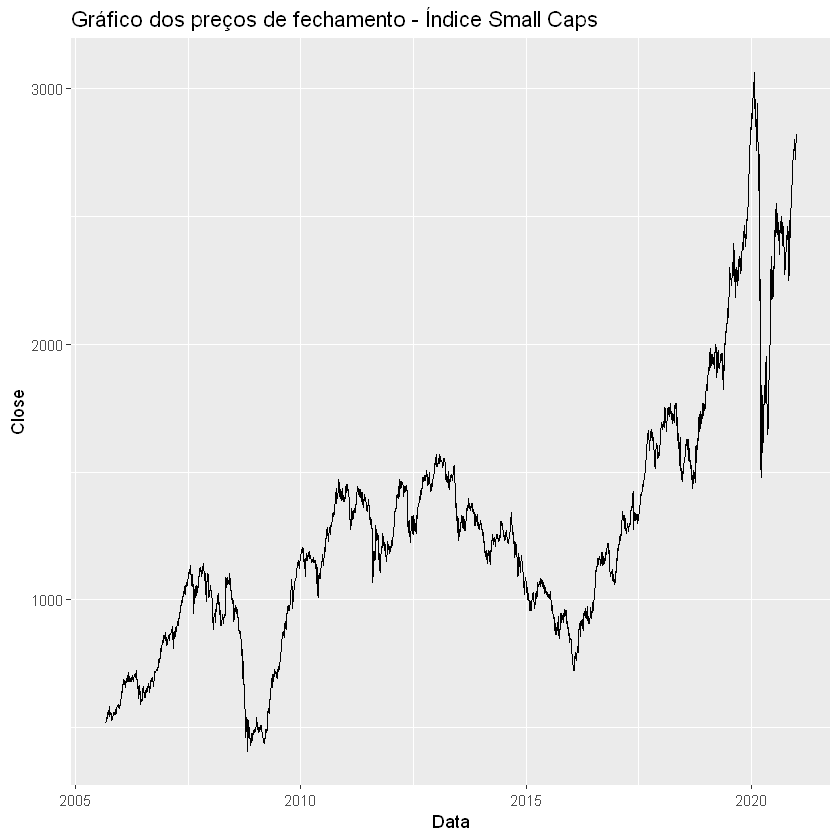

In [10]:
Data <- smll$data
Close <- smll$close

smll %>%
    ggplot() + 
    geom_line(aes(x = Data, y = Close)) +
    ggtitle("Gráfico dos preços de fechamento - Índice Small Caps")

# Etapa 2: Construção da série de direção do atributo "close"

In [11]:
# Biblioteca(s) Necessária(s)
library(quantmod)

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: 'xts'

The following objects are masked from 'package:dplyr':

    first, last

Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.


**Direção da Variável Preço:**

* 1 = up (aumento do preço da ação)

* 0 = down (redução do preço da ação)

In [12]:
direction <- NULL

# Direção = Up quando preço atual > preço anterior de 20 dias
direction[smll$close > lag(smll$close, 20)] <- 1

# Direção = Up quando preço atual < preço anterior de 20 dias
direction[smll$close < lag(smll$close, 20)] <- 0

smll$direction <- direction

In [13]:
colnames(smll)

[1] "data"       "close"      "avg10"      "avg20"      "std10"     
 [6] "std20"      "rsi14"      "rsi5"       "macd1226"   "signal9"   
[11] "histogram9" "macd0720"   "signal5"    "histogram5" "bbands"    
[16] "direction"

**Direção do Retorno da Ação**:

* "up" = aumento do retorno

* "down" = redução do retorno

* "nowhere" = nenhum dos casos anteriores

In [14]:
lagret <- (smll$close - lag(smll$close, 20)) / lag(smll$close, 20)

dirret <- NULL

dirret[lagret < 0.02] <- "down"
dirret[lagret > 0.02] <- "up"
dirret[lagret < 0.02 & lagret > -0.02] <- "nowhere"

smll$dirret <- dirret

In [15]:
colnames(smll)

[1] "data"       "close"      "avg10"      "avg20"      "std10"     
 [6] "std20"      "rsi14"      "rsi5"       "macd1226"   "signal9"   
[11] "histogram9" "macd0720"   "signal5"    "histogram5" "bbands"    
[16] "direction"  "dirret"

# Etapa 3: Identificação e tratamento de *missing values*

## 1. Contabilização de *missing values*

In [16]:
round(prop.table(table(is.na(smll)))*100, digits = 2)

# 0.47% do dataframe corresponde a missing values


FALSE  TRUE 
99.53  0.47 

## 2. Remoção dos *missing values*

In [17]:
smlln <- na.omit(smll)

round(prop.table(table(is.na(smlln)))*100, digits = 2)

# O dataframe não possui missing values


FALSE 
  100 

In [18]:
head(smlln)

# o novo dataframe tem início em 21/10/2005

data,close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands,direction,dirret
2005-10-21,535.51,548.069,555.6270,11.263658,13.35135,32.14348,31.14326,262.4648,52.49296,209.97185,115.19920,116.82055,-1.621347,53.40541,0,down
2005-10-24,537.57,546.257,554.6420,11.358530,13.93758,30.29730,32.32622,243.2300,90.64038,152.58966,103.58007,112.40706,-8.826982,55.75030,0,down
2005-10-25,535.31,543.926,553.5905,10.922979,14.58116,33.08411,46.04782,225.2079,117.55389,107.65404,92.87971,105.89794,-13.018229,58.32464,0,down
2005-10-26,539.95,542.041,552.7665,9.619677,14.87494,40.00209,44.64646,208.8917,135.82145,73.07025,84.12543,98.64044,-14.515010,59.49978,0,down
2005-10-27,530.43,539.704,551.0105,9.278226,15.35175,42.84595,56.77064,192.9684,147.25084,45.71754,74.70870,90.66319,-15.954492,61.40698,0,down
2005-10-28,538.42,538.118,549.5950,7.737385,15.12960,39.82082,55.49679,178.9311,153.58690,25.34425,67.77655,83.03431,-15.257764,60.51840,0,down


# Etapa 4: Análise Exploratória de Dados

## 1. Estatística Descritiva

In [19]:
summary(smlln[,-c(1, 16, 17)])

     close            avg10            avg20            std10        
 Min.   : 405.9   Min.   : 450.6   Min.   : 458.5   Min.   :  2.971  
 1st Qu.: 960.7   1st Qu.: 957.4   1st Qu.: 957.5   1st Qu.: 11.437  
 Median :1221.4   Median :1216.8   Median :1212.9   Median : 16.971  
 Mean   :1284.1   Mean   :1281.5   Mean   :1278.5   Mean   : 21.949  
 3rd Qu.:1472.7   3rd Qu.:1471.0   3rd Qu.:1470.4   3rd Qu.: 25.698  
 Max.   :3064.1   Max.   :3002.7   Max.   :2962.5   Max.   :349.881  
     std20             rsi14            rsi5           macd1226       
 Min.   :  3.972   Min.   : 0.00   Min.   :  0.00   Min.   :-337.364  
 1st Qu.: 16.892   1st Qu.:41.10   1st Qu.: 32.24   1st Qu.:  -8.060  
 Median : 24.523   Median :54.09   Median : 56.01   Median :   4.690  
 Mean   : 31.533   Mean   :54.43   Mean   : 54.85   Mean   :   4.889  
 3rd Qu.: 35.696   3rd Qu.:68.28   3rd Qu.: 79.00   3rd Qu.:  19.153  
 Max.   :483.142   Max.   :97.45   Max.   :100.00   Max.   : 262.465  
    signal9  

A função "summary" não fornece todas as estatísticas descritivas (ex.: desvio padrão, assimetria, curtose...).

Para uma análise mais completa criaremos uma tabela com mais medidas de estatística descritiva.

In [20]:
# Biblioteca(s) Necessária(s)
library(moments)

In [21]:
# Remoção das colunas "data", "direction" e "dirret"
msmll <- as.matrix(smlln[,-c(1, 16, 17)])    

In [22]:
# Cálculo das medidas de estatística descritiva
n <- ncol(msmll)

# Média
mean_smll <- numeric(n)
names(mean_smll) <- colnames(msmll)
for (i in 1:n) {
    mean_smll[i] <- mean(msmll[,i])
}
mean_smll <- round(mean_smll, digits = 2)

# Desvio Padrão
sd_smll <- numeric(n)
names(sd_smll) <- colnames(msmll)
for (i in 1:n) {
    sd_smll[i] <- sd(msmll[,i])
}
sd_smll <- round(sd_smll, digits = 2)

# Mínimo
min_smll <- numeric(n)
names(min_smll) <- colnames(msmll)
for (i in 1:n) {
    min_smll[i] <- min(msmll[,i])
}
min_smll <- round(min_smll, digits = 2)

# 1º Qurtil
q1_smll <- numeric(n)
names(q1_smll) <- colnames(msmll)
for (i in 1:n) {
    q1_smll[i] <- quantile(msmll[,i], probs = 0.25)
}
q1_smll <- round(q1_smll, digits = 2)

# Mediana
median_smll <- numeric(n)
names(median_smll) <- colnames(msmll)
for (i in 1:n) {
    median_smll[i] <- median(msmll[,i])
}
median_smll <- round(median_smll, digits = 2)

# 3º Qurtil
q3_smll <- numeric(n)
names(q3_smll) <- colnames(msmll)
for (i in 1:n) {
    q3_smll[i] <- quantile(msmll[,i], probs = 0.75)
}
q3_smll <- round(q3_smll, digits = 2)

# Máximo
max_smll <- numeric(n)
names(max_smll) <- colnames(msmll)
for (i in 1:n) {
    max_smll[i] <- max(msmll[,i])
}
max_smll <- round(max_smll, digits = 2)

# Coeficiente de Variação
cv_smll <- numeric(n)
names(cv_smll) <- colnames(msmll)
for (i in 1:n) {
    cv_smll[i] <- sd(msmll[,i])/mean(msmll[,i])
}
cv_smll <- round(cv_smll, digits = 2)

# Assimetria
skew_smll <- numeric(n)
names(skew_smll) <- colnames(msmll)
for (i in 1:n) {
    skew_smll[i] <- skewness(msmll[,i])
}
skew_smll <- round(skew_smll, digits = 2)

# Curtose
kurt_smll <- numeric(n)
names(kurt_smll) <- colnames(msmll)
for (i in 1:n) {
    kurt_smll[i] <- kurtosis(msmll[,i])
}
kurt_smll <- round(kurt_smll, digits = 2)

In [23]:
# Montagem da matriz com as medidas de estatística descritiva
stat_data1 <- c(mean_smll, sd_smll, min_smll, q1_smll, median_smll, q3_smll, max_smll, cv_smll, skew_smll, kurt_smll)
stat_smll <- matrix(stat_data1, nrow = 14, ncol = 10)
colnames(stat_smll) <- c("media", "sd", "min", "q1", "median", "q3", "max", "cv", "skew", "kurt")
rownames(stat_smll) <- c("close", "avg10", "avg20", "std10", "std20", "rsi14", "rsi5", "macd1226", "signal9", "histogram9",
                         "macd7205", "signal5", "histogram5", "bbands")
stat_smll

,media,sd,min,q1,median,q3,max,cv,skew,kurt
close,1284.13,495.76,405.93,960.69,1221.36,1472.70,3064.07,0.39,1.04,4.23
avg10,1281.46,492.81,450.62,957.44,1216.84,1470.97,3002.74,0.38,1.03,4.20
avg20,1278.55,489.41,458.47,957.46,1212.90,1470.39,2962.49,0.38,1.01,4.16
std10,21.95,21.86,2.97,11.44,16.97,25.70,349.88,1.00,7.32,87.85
std20,31.53,32.91,3.97,16.89,24.52,35.70,483.14,1.04,7.64,86.51
rsi14,54.43,18.49,0.00,41.10,54.09,68.28,97.45,0.34,-0.03,2.41
rsi5,54.85,28.56,0.00,32.24,56.01,79.00,100.00,0.52,-0.18,1.99
macd1226,4.89,33.37,-337.36,-8.06,4.69,19.15,262.46,6.83,-2.22,30.94
signal9,4.82,31.48,-286.02,-7.73,4.86,18.74,156.15,6.53,-2.34,26.58
histogram9,0.07,9.75,-97.65,-3.42,-0.02,3.34,209.97,146.80,3.06,97.26


## 2. Identificação e tratamento de *outliers*

### 2.1. Identificação de *outliers*

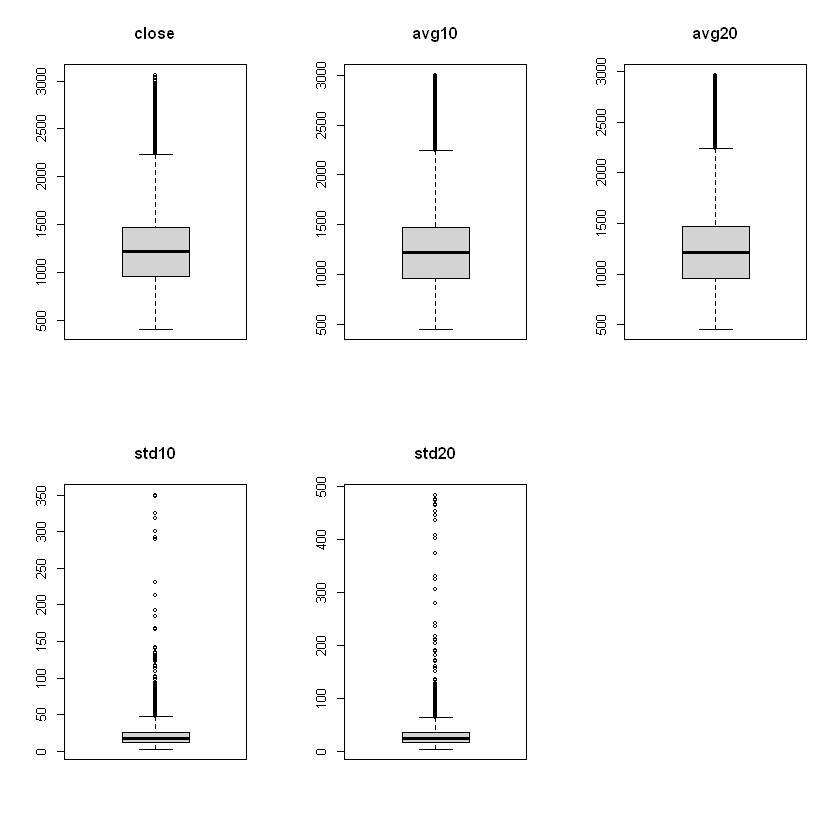

In [24]:
par(mfrow=c(2,3))

boxplot(smlln$close, col="light gray",  main="close", border="black", horizontal=FALSE)

boxplot(smlln$avg10, col="light gray", main="avg10", border="black", horizontal=FALSE)

boxplot(smlln$avg20, col="light gray", main="avg20", border="black", horizontal=FALSE)

boxplot(smlln$std10, col="light gray", main="std10", border="black", horizontal=FALSE)

boxplot(smlln$std20, col="light gray", main="std20", border="black", horizontal=FALSE)

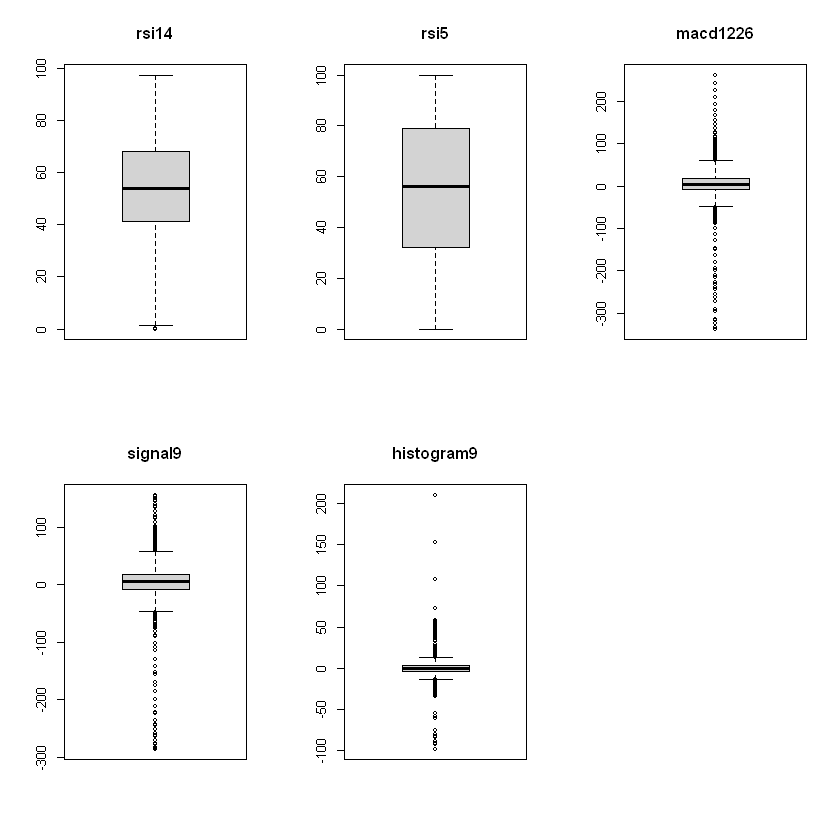

In [25]:
par(mfrow=c(2,3))

boxplot(smlln$rsi14, col="light gray", main="rsi14", border="black", horizontal=FALSE)

boxplot(smlln$rsi5, col="light gray", main="rsi5", border="black", horizontal=FALSE)

boxplot(smlln$macd1226, col="light gray", main="macd1226", border="black", horizontal=FALSE)

boxplot(smlln$signal9, col="light gray",  main="signal9", border="black", horizontal=FALSE)

boxplot(smlln$histogram9, col="light gray", main="histogram9", border="black", horizontal=FALSE)

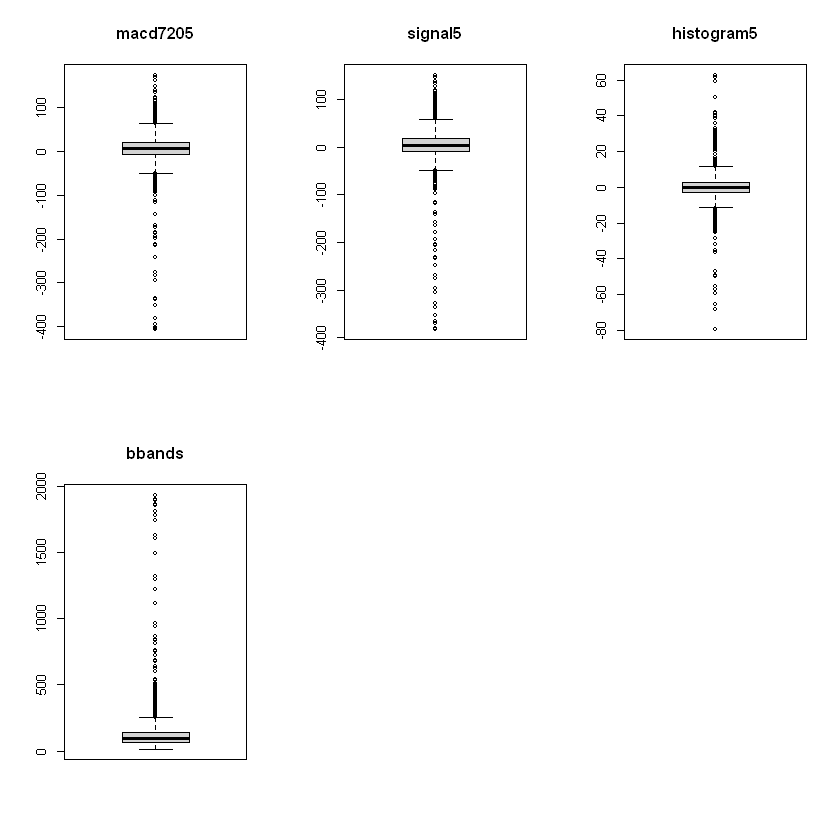

In [26]:
par(mfrow=c(2,3))

boxplot(smlln$macd0720, col="light gray", main="macd7205", border="black", horizontal=FALSE)

boxplot(smlln$signal5, col="light gray", main="signal5", border="black", horizontal=FALSE)

boxplot(smlln$histogram5, col="light gray", main="histogram5", border="black", horizontal=FALSE)

boxplot(smlln$bbands, col="light gray", main="bbands", border="black", horizontal=FALSE)

### 2.2. Tratamento de *outliers*

In [27]:
# Biblioteca(s) Necessária(s)
library(outliers)

In [28]:
# Substituição dos outliers pelas medianas dos dados
smllout <- rm.outlier(smlln[,-c(1, 16, 17)], fill = TRUE, median = TRUE, opposite = FALSE)

In [29]:
head(smllout)

close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands
535.51,548.069,555.6270,11.263658,13.35135,32.14348,31.14326,262.4648,52.49296,-0.02411624,115.19920,116.82055,-1.621347,53.40541
537.57,546.257,554.6420,11.358530,13.93758,30.29730,32.32622,243.2300,90.64038,152.58966290,103.58007,112.40706,-8.826982,55.75030
535.31,543.926,553.5905,10.922979,14.58116,33.08411,46.04782,225.2079,117.55389,107.65403662,92.87971,105.89794,-13.018229,58.32464
539.95,542.041,552.7665,9.619677,14.87494,40.00209,44.64646,208.8917,135.82145,73.07025173,84.12543,98.64044,-14.515010,59.49978
530.43,539.704,551.0105,9.278226,15.35175,42.84595,56.77064,192.9684,147.25084,45.71753961,74.70870,90.66319,-15.954492,61.40698
538.42,538.118,549.5950,7.737385,15.12960,39.82082,55.49679,178.9311,153.58690,25.34424597,67.77655,83.03431,-15.257764,60.51840


In [30]:
smllout <- cbind(smlln[,1], smllout, smlln[,16:17])

In [31]:
head(smllout)

data,close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands,direction,dirret
2005-10-21,535.51,548.069,555.6270,11.263658,13.35135,32.14348,31.14326,262.4648,52.49296,-0.02411624,115.19920,116.82055,-1.621347,53.40541,0,down
2005-10-24,537.57,546.257,554.6420,11.358530,13.93758,30.29730,32.32622,243.2300,90.64038,152.58966290,103.58007,112.40706,-8.826982,55.75030,0,down
2005-10-25,535.31,543.926,553.5905,10.922979,14.58116,33.08411,46.04782,225.2079,117.55389,107.65403662,92.87971,105.89794,-13.018229,58.32464,0,down
2005-10-26,539.95,542.041,552.7665,9.619677,14.87494,40.00209,44.64646,208.8917,135.82145,73.07025173,84.12543,98.64044,-14.515010,59.49978,0,down
2005-10-27,530.43,539.704,551.0105,9.278226,15.35175,42.84595,56.77064,192.9684,147.25084,45.71753961,74.70870,90.66319,-15.954492,61.40698,0,down
2005-10-28,538.42,538.118,549.5950,7.737385,15.12960,39.82082,55.49679,178.9311,153.58690,25.34424597,67.77655,83.03431,-15.257764,60.51840,0,down


## 3. Histogramas

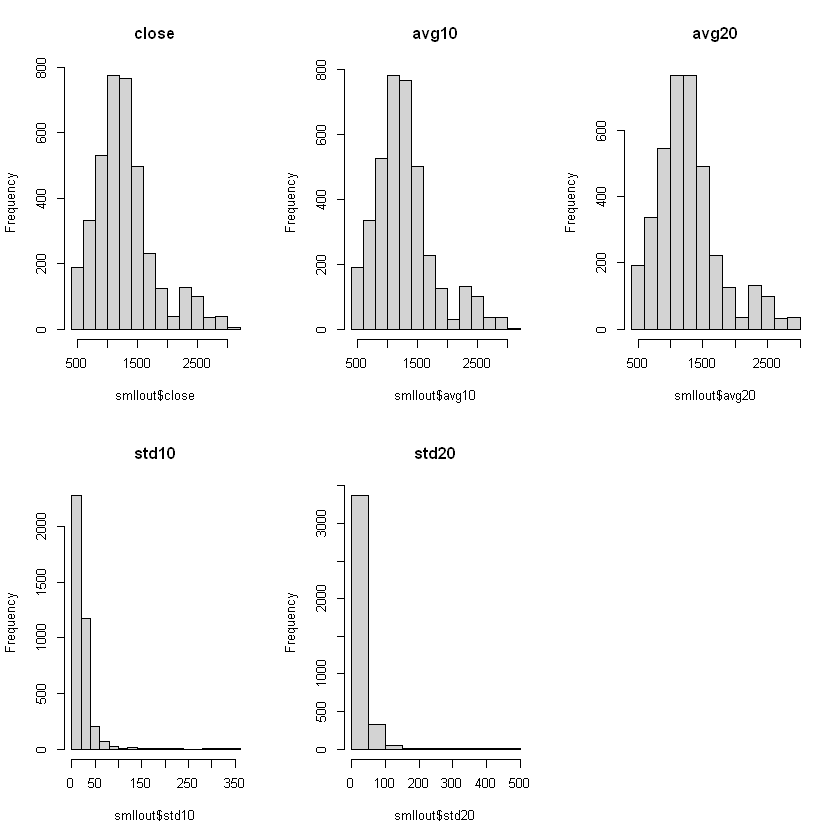

In [32]:
par(mfrow=c(2,3))

hist(smllout$close, col="light gray",  main="close", border="black")

hist(smllout$avg10, col="light gray", main="avg10", border="black")

hist(smllout$avg20, col="light gray", main="avg20", border="black")

hist(smllout$std10, col="light gray", main="std10", border="black")

hist(smllout$std20, col="light gray", main="std20", border="black")

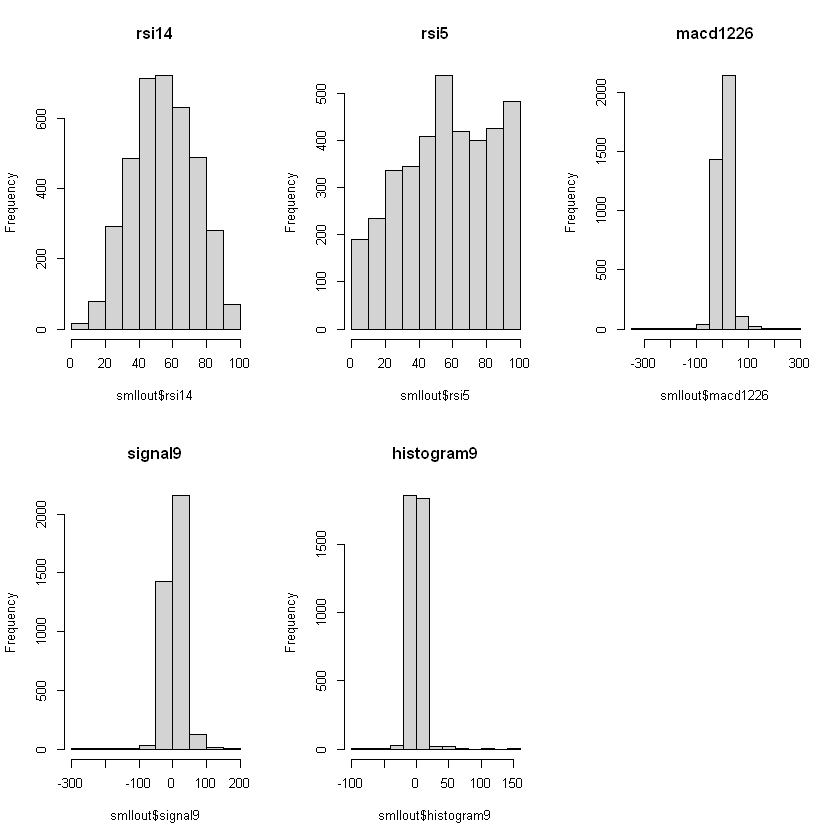

In [33]:
par(mfrow=c(2,3))

hist(smllout$rsi14, col="light gray", main="rsi14", border="black")

hist(smllout$rsi5, col="light gray", main="rsi5", border="black")

hist(smllout$macd1226, col="light gray", main="macd1226", border="black")

hist(smllout$signal9, col="light gray",  main="signal9", border="black")

hist(smllout$histogram9, col="light gray", main="histogram9", border="black")

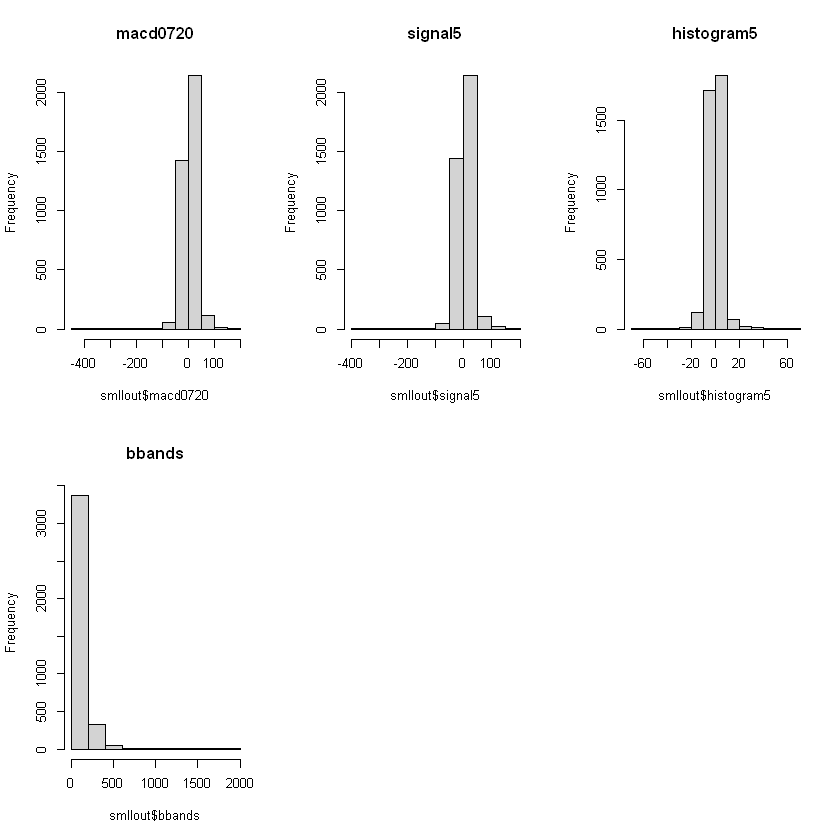

In [34]:
par(mfrow=c(2,3))

hist(smllout$macd0720, col="light gray", main="macd0720", border="black")

hist(smllout$signal5, col="light gray", main="signal5", border="black")

hist(smllout$histogram5, col="light gray", main="histogram5", border="black")

hist(smllout$bbands, col="light gray", main="bbands", border="black")

## 4. Densidades

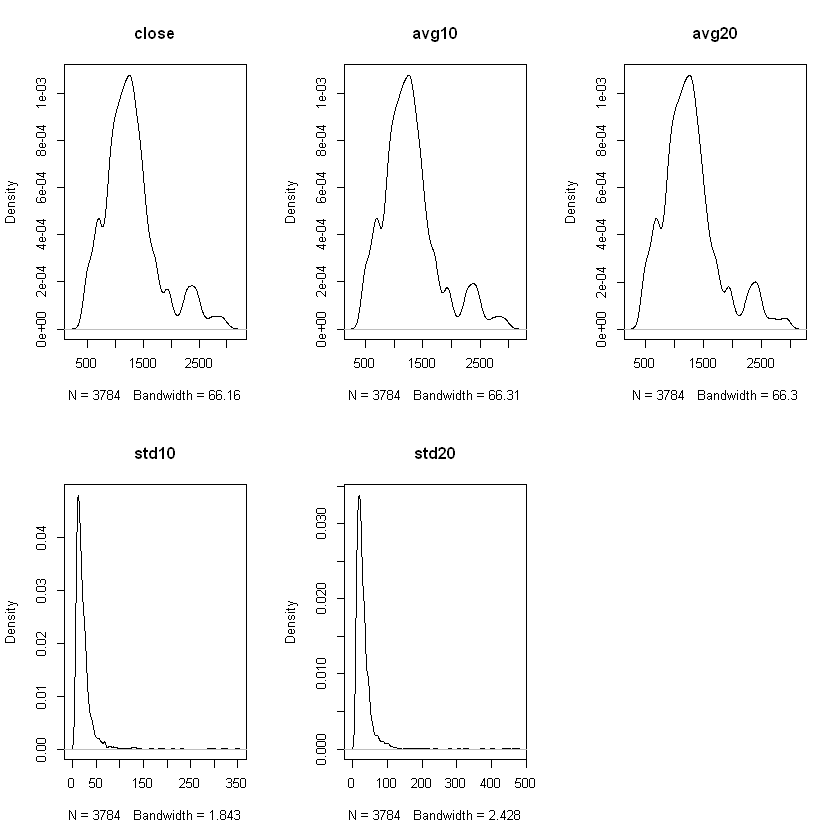

In [35]:
par(mfrow=c(2,3))

den1 <- density(smllout$close)
plot(den1, main = "close")

den2 <- density(smllout$avg10)
plot(den2, main = "avg10")

den3 <- density(smllout$avg20)
plot(den3, main = "avg20")

den4 <- density(smllout$std10)
plot(den4, main = "std10")

den5 <- density(smllout$std20)
plot(den5, main = "std20")

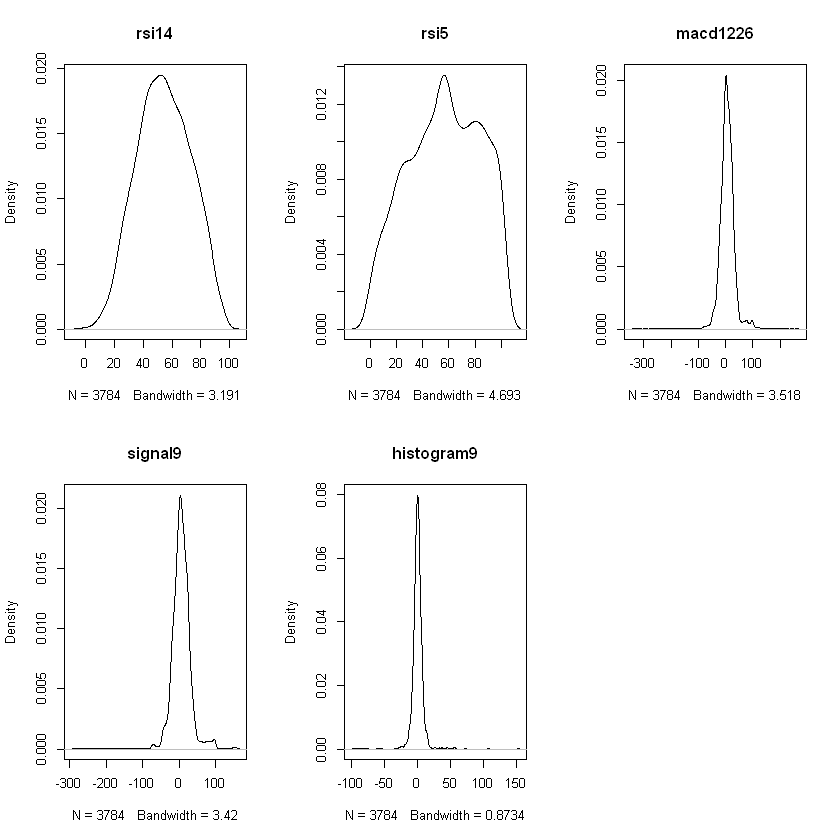

In [36]:
par(mfrow=c(2,3))

den6 <- density(smllout$rsi14)
plot(den6, main = "rsi14")

den7 <- density(smllout$rsi5)
plot(den7, main = "rsi5")

den8 <- density(smllout$macd1226)
plot(den8, main = "macd1226")

den9 <- density(smllout$signal9)
plot(den9, main = "signal9")

den10 <- density(smllout$histogram9)
plot(den10, main = "histogram9")

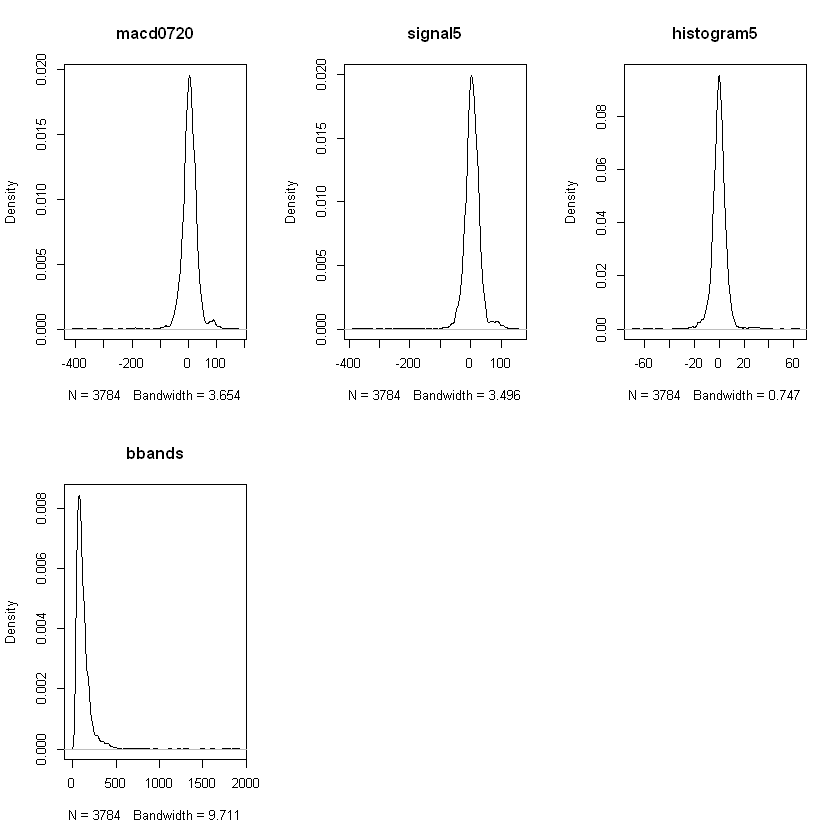

In [37]:
par(mfrow=c(2,3))

den11 <- density(smllout$macd0720)
plot(den11, main = "macd0720")

den12 <- density(smllout$signal5)
plot(den12, main = "signal5")

den13 <- density(smllout$histogram5)
plot(den13, main = "histogram5")

den14 <- density(smllout$bbands)
plot(den14, main = "bbands")

## 5. Correlação

In [38]:
# Biblioteca(s) Necessária(s)
library(corrplot)

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


In [39]:
# Cálculo das correlações entre os atributos numéricos
df <- smllout[,c(2:15)]

round(cor(df), digits = 2)

,close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands
close,1.00,0.99,0.99,0.39,0.37,0.13,0.06,0.20,0.21,0.00,0.21,0.21,0.00,0.37
avg10,0.99,1.00,0.99,0.41,0.38,0.08,0.01,0.16,0.19,-0.06,0.15,0.17,-0.07,0.38
avg20,0.99,0.99,1.00,0.44,0.41,0.04,-0.01,0.11,0.15,-0.09,0.10,0.12,-0.08,0.41
std10,0.39,0.41,0.44,1.00,0.82,-0.08,-0.02,-0.34,-0.32,-0.21,-0.37,-0.35,-0.09,0.82
std20,0.37,0.38,0.41,0.82,1.00,0.00,0.01,-0.37,-0.33,-0.10,-0.37,-0.38,0.04,1.00
rsi14,0.13,0.08,0.04,-0.08,0.00,1.00,0.58,0.53,0.44,0.45,0.65,0.59,0.34,0.00
rsi5,0.06,0.01,-0.01,-0.02,0.01,0.58,1.00,0.25,0.16,0.40,0.36,0.26,0.57,0.01
macd1226,0.20,0.16,0.11,-0.34,-0.37,0.53,0.25,1.00,0.94,0.29,0.94,0.97,-0.05,-0.37
signal9,0.21,0.19,0.15,-0.32,-0.33,0.44,0.16,0.94,1.00,0.04,0.81,0.88,-0.23,-0.33
histogram9,0.00,-0.06,-0.09,-0.21,-0.10,0.45,0.40,0.29,0.04,1.00,0.51,0.37,0.71,-0.10


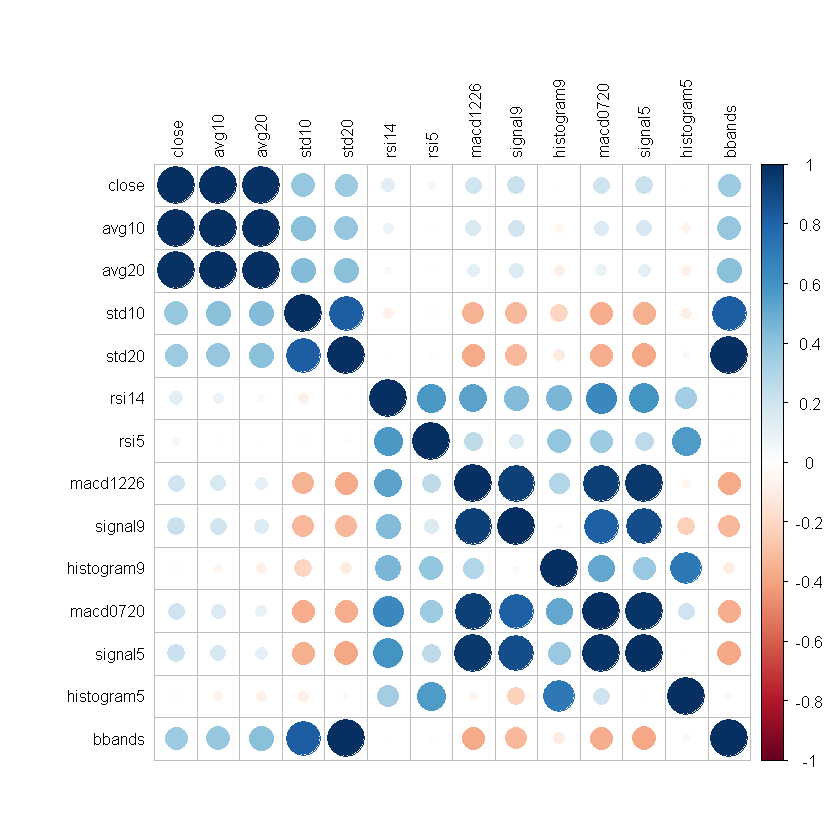

In [40]:
# Matriz de correlação
corrplot(cor(df), method = "circle", tl.col="black", tl.cex=0.8, tl.srt=90)

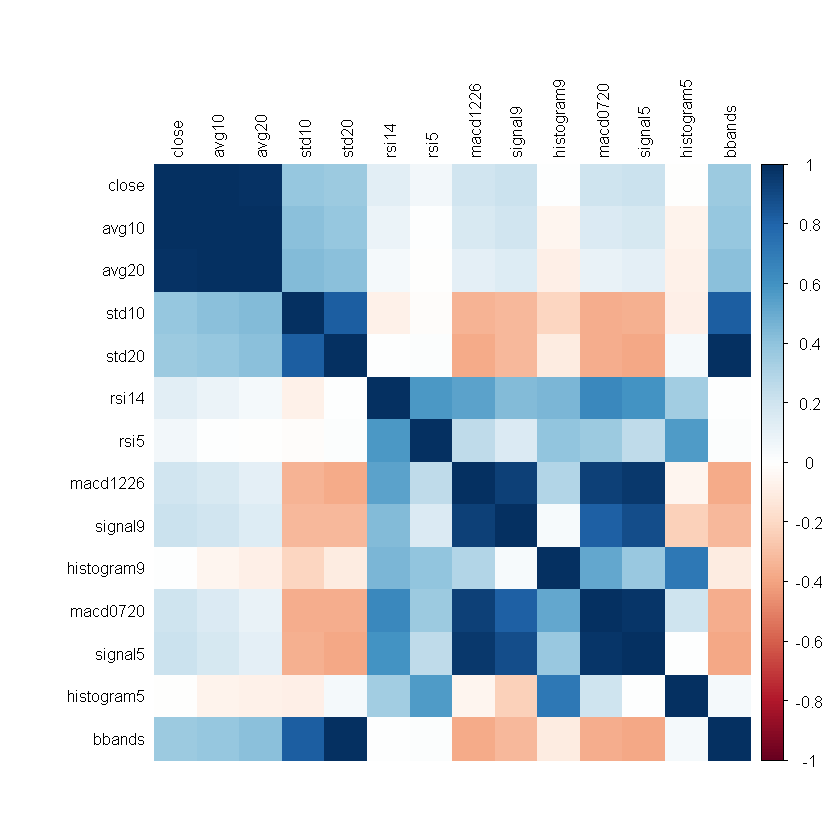

In [41]:
corrplot(cor(df), method = "color", tl.col="black", tl.cex=0.8, tl.srt=90)

## 6. QQ Plot

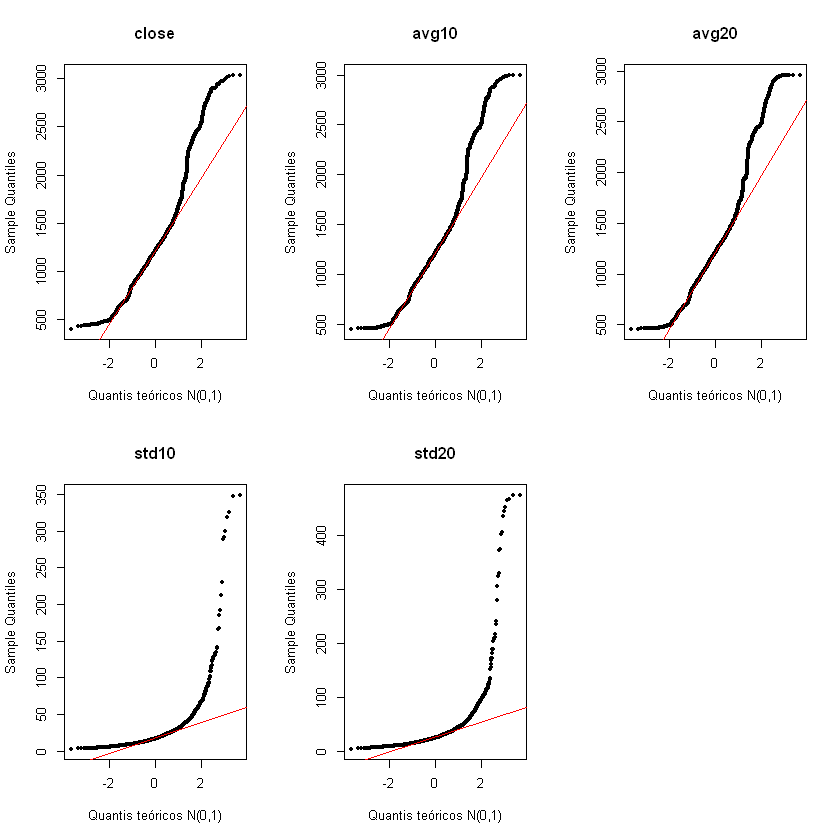

In [42]:
par(mfrow=c(2,3))

qqnorm(smllout$close, main = "close", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(smllout$close, lty = 1, col = "red")

qqnorm(smllout$avg10, main = "avg10", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(smllout$avg10, lty = 1, col = "red")

qqnorm(smllout$avg20, main = "avg20", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(smllout$avg20, lty = 1, col = "red")

qqnorm(smllout$std10, main = "std10", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(smllout$std10, lty = 1, col = "red")

qqnorm(smllout$std20, main = "std20", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(smllout$std20, lty = 1, col = "red")

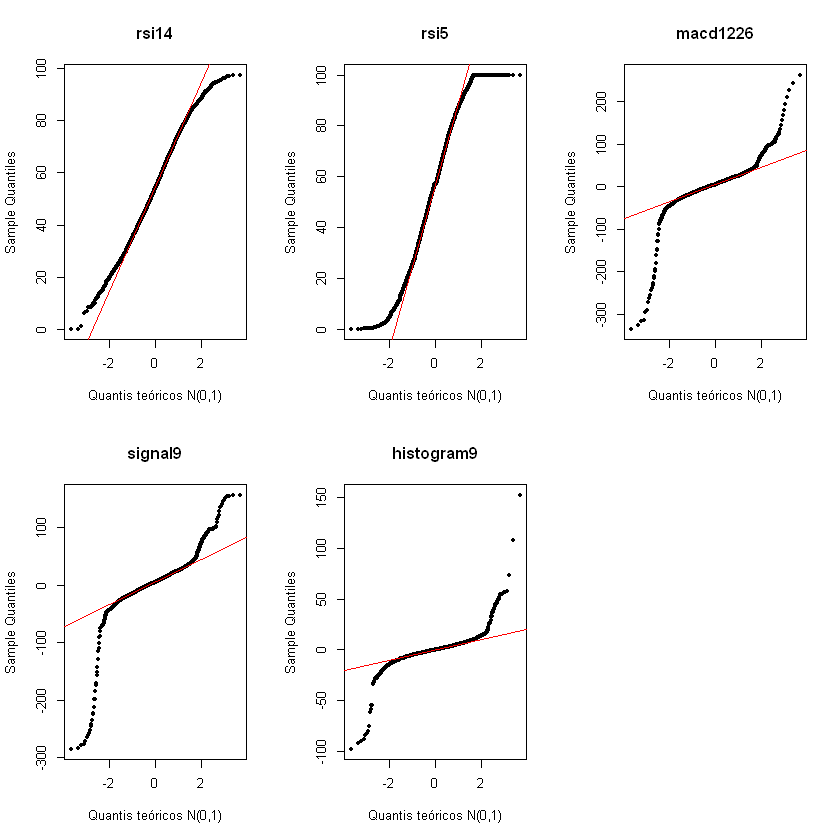

In [43]:
par(mfrow=c(2,3))

qqnorm(smllout$rsi14, main = "rsi14", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(smllout$rsi14, lty = 1, col = "red")

qqnorm(smllout$rsi5, main = "rsi5", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(smllout$rsi5, lty = 1, col = "red")

qqnorm(smllout$macd1226, main = "macd1226", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(smllout$macd1226, lty = 1, col = "red")

qqnorm(smllout$signal9, main = "signal9", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(smllout$signal9, lty = 1, col = "red")

qqnorm(smllout$histogram9, main = "histogram9", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(smllout$histogram9, lty = 1, col = "red")

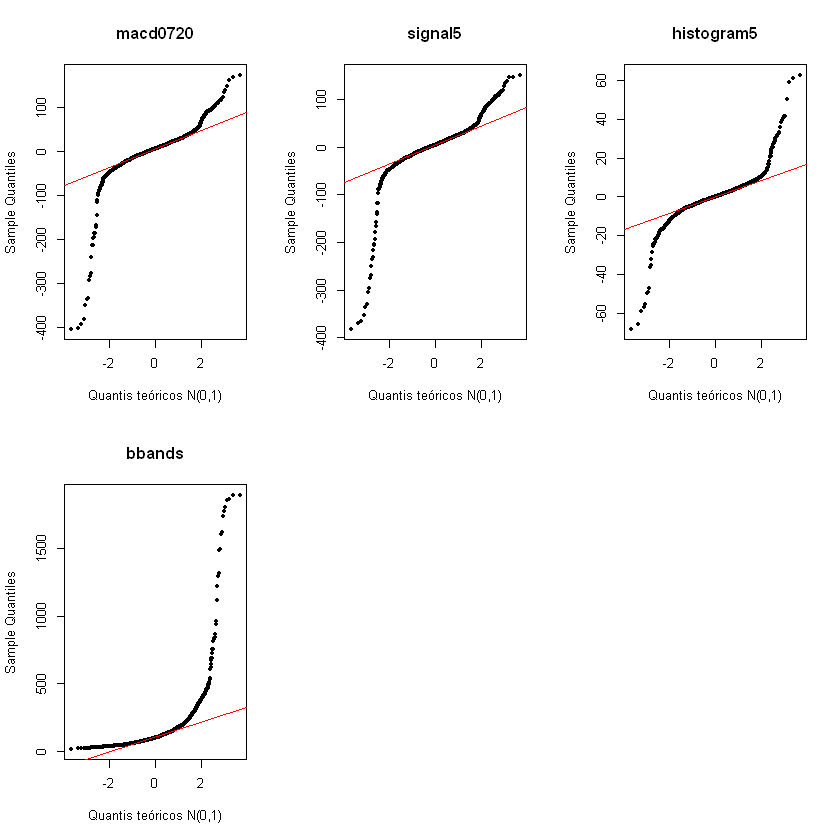

In [44]:
par(mfrow=c(2,3))

qqnorm(smllout$macd0720, main = "macd0720", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(smllout$macd0720, lty = 1, col = "red")

qqnorm(smllout$signal5, main = "signal5", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(smllout$signal5, lty = 1, col = "red")

qqnorm(smllout$histogram5, main = "histogram5", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(smllout$histogram5, lty = 1, col = "red")

qqnorm(smllout$bbands, main = "bbands", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(smllout$bbands, lty = 1, col = "red")

# Etapa 6: Preprocessamento dos Dados

## 1. Normalização - Método Min-Max

In [45]:
# Função para normalização dos dados
normalize_minmax = function(x) {
    return ((x - min(x)) / (max(x) - min(x)))
}

In [46]:
smllmm <- normalize_minmax(smllout[,-c(1, 16, 17)])
head(smllmm)

close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands
0.2729010,0.2765504,0.2787466,0.1205652,0.1211719,0.1266325,0.1263419,0.1935594,0.1325457,0.1172852,0.1507669,0.1512380,0.1168211,0.1328108
0.2734996,0.2760238,0.2784603,0.1205928,0.1213422,0.1260960,0.1266856,0.1879701,0.1436306,0.1616318,0.1473906,0.1499555,0.1147273,0.1334922
0.2728428,0.2753465,0.2781548,0.1204662,0.1215292,0.1269058,0.1306728,0.1827332,0.1514511,0.1485744,0.1442813,0.1480641,0.1135094,0.1342402
0.2741911,0.2747987,0.2779154,0.1200875,0.1216146,0.1289161,0.1302656,0.1779921,0.1567593,0.1385250,0.1417374,0.1459552,0.1130745,0.1345817
0.2714248,0.2741196,0.2774051,0.1199883,0.1217532,0.1297424,0.1337887,0.1733651,0.1600804,0.1305769,0.1390011,0.1436372,0.1126562,0.1351359
0.2737465,0.2736588,0.2769938,0.1195406,0.1216886,0.1288634,0.1334185,0.1692861,0.1619216,0.1246568,0.1369868,0.1414204,0.1128586,0.1348777


In [47]:
data <- smllout$data
direction <- smllout$direction
dirret <- smllout$dirret

smllmm <- cbind(data, smllmm, direction, dirret)
head(smllmm)

data,close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands,direction,dirret
2005-10-21,0.2729010,0.2765504,0.2787466,0.1205652,0.1211719,0.1266325,0.1263419,0.1935594,0.1325457,0.1172852,0.1507669,0.1512380,0.1168211,0.1328108,0,down
2005-10-24,0.2734996,0.2760238,0.2784603,0.1205928,0.1213422,0.1260960,0.1266856,0.1879701,0.1436306,0.1616318,0.1473906,0.1499555,0.1147273,0.1334922,0,down
2005-10-25,0.2728428,0.2753465,0.2781548,0.1204662,0.1215292,0.1269058,0.1306728,0.1827332,0.1514511,0.1485744,0.1442813,0.1480641,0.1135094,0.1342402,0,down
2005-10-26,0.2741911,0.2747987,0.2779154,0.1200875,0.1216146,0.1289161,0.1302656,0.1779921,0.1567593,0.1385250,0.1417374,0.1459552,0.1130745,0.1345817,0,down
2005-10-27,0.2714248,0.2741196,0.2774051,0.1199883,0.1217532,0.1297424,0.1337887,0.1733651,0.1600804,0.1305769,0.1390011,0.1436372,0.1126562,0.1351359,0,down
2005-10-28,0.2737465,0.2736588,0.2769938,0.1195406,0.1216886,0.1288634,0.1334185,0.1692861,0.1619216,0.1246568,0.1369868,0.1414204,0.1128586,0.1348777,0,down


## 2. Normalização - Método Z-Score

In [48]:
# Função para normalização dos dados
normalize_zscore = function(x) {
    return ((x - mean(x)) / sd(x))
}

In [49]:
m <- as.matrix(smllout[,-c(1, 16, 17)]) 

smllz <- normalize_zscore(m)

head(smllz)

close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands
0.4233000,0.4455409,0.4589254,-0.5050930,-0.5013959,-0.4681167,-0.4698880,-0.06023838,-0.4320796,-0.5250826,-0.3210325,-0.3181613,-0.5279112,-0.4304638
0.4269481,0.4423320,0.4571811,-0.5049250,-0.5003577,-0.4713861,-0.4677931,-0.09430143,-0.3645240,-0.2548174,-0.3416089,-0.3259772,-0.5406717,-0.4263112
0.4229458,0.4382040,0.4553190,-0.5056963,-0.4992180,-0.4664509,-0.4434934,-0.12621698,-0.3168626,-0.3343943,-0.3605583,-0.3375042,-0.5480940,-0.4217522
0.4311629,0.4348658,0.4538597,-0.5080043,-0.4986977,-0.4541998,-0.4459751,-0.15511154,-0.2845124,-0.3956391,-0.3760614,-0.3503566,-0.5507447,-0.4196712
0.4143038,0.4307272,0.4507500,-0.5086090,-0.4978534,-0.4491636,-0.4245042,-0.18331032,-0.2642720,-0.4440783,-0.3927375,-0.3644836,-0.5532939,-0.4162937
0.4284534,0.4279186,0.4482433,-0.5113377,-0.4982468,-0.4545208,-0.4267601,-0.20816899,-0.2530514,-0.4801575,-0.4050138,-0.3779936,-0.5520600,-0.4178673


In [50]:
data <- smllout$data
direction <- smllout$direction
dirret <- smllout$dirret

smllz <- data.frame(smllz)

smllz <- cbind(data, smllz, direction, dirret)
head(smllz)

data,close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands,direction,dirret
2005-10-21,0.4233000,0.4455409,0.4589254,-0.5050930,-0.5013959,-0.4681167,-0.4698880,-0.06023838,-0.4320796,-0.5250826,-0.3210325,-0.3181613,-0.5279112,-0.4304638,0,down
2005-10-24,0.4269481,0.4423320,0.4571811,-0.5049250,-0.5003577,-0.4713861,-0.4677931,-0.09430143,-0.3645240,-0.2548174,-0.3416089,-0.3259772,-0.5406717,-0.4263112,0,down
2005-10-25,0.4229458,0.4382040,0.4553190,-0.5056963,-0.4992180,-0.4664509,-0.4434934,-0.12621698,-0.3168626,-0.3343943,-0.3605583,-0.3375042,-0.5480940,-0.4217522,0,down
2005-10-26,0.4311629,0.4348658,0.4538597,-0.5080043,-0.4986977,-0.4541998,-0.4459751,-0.15511154,-0.2845124,-0.3956391,-0.3760614,-0.3503566,-0.5507447,-0.4196712,0,down
2005-10-27,0.4143038,0.4307272,0.4507500,-0.5086090,-0.4978534,-0.4491636,-0.4245042,-0.18331032,-0.2642720,-0.4440783,-0.3927375,-0.3644836,-0.5532939,-0.4162937,0,down
2005-10-28,0.4284534,0.4279186,0.4482433,-0.5113377,-0.4982468,-0.4545208,-0.4267601,-0.20816899,-0.2530514,-0.4801575,-0.4050138,-0.3779936,-0.5520600,-0.4178673,0,down


# Etapa 7: Seleção de atributos

In [51]:
# Biblioteca(s) Necessária(s)
library(caret)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice


## 1. Seleção dos atributos com maiores correlações 

In [52]:
# Matriz de correlação
y <- smllout[,-c(1, 16, 17)]

corrsmll <- cor(y)

# Seleção dos atributos que são altamente correlacionados (isealmente > 0.75)
highcorrsmll <- findCorrelation(corrsmll, cutoff = 0.5)

# Exibição dos índices que possuem correlação elevada 
print(highcorrsmll)

 [1] 11 12  8  4 14  1  2  6 10 13


* índice 11: macd0720

* índice 12: signal5

* índice 8: macd1226

* índice 4: std10

* índice 14: bbands

* índice 1: close

* índice 2: avg10

* índice: rsi14

* índice 10: histogram9

* índice 13: histogram5

## 2. Seleção automática de atributos

Método utilizado para seleção automática dos atributos: *Recursive Feature Elimination* (RFE).

In [53]:
# Definição do controle por meio de uma função de seleção random forest
control <- rfeControl(functions=rfFuncs, method="cv", number=10)

In [54]:
z <- smllout[,-c(1, 17)]

resultsmll <- rfe(direction~., z, rfeControl=control)

Warning message in randomForest.default(x, y, importance = TRUE, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"Warning message in randomForest.default(x, y, importance = TRUE, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"Warning message in randomForest.default(x, y, importance = TRUE, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"Warning message in randomForest.default(x, y, importance = TRUE, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"Warning message in randomForest.default(x, y, importance = TRUE, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"Warning message in randomForest.default(x, y, importance = TRUE, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"Warning message in randomForest.default(x, y, 

In [55]:
# Resultado da seleção
print(resultsmll)


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables   RMSE Rsquared    MAE  RMSESD RsquaredSD   MAESD Selected
         4 0.2825   0.6703 0.1578 0.02076    0.04500 0.01439         
         8 0.2712   0.6965 0.1509 0.01553    0.03108 0.01046         
        14 0.2588   0.7239 0.1429 0.01596    0.03228 0.01071        *

The top 5 variables (out of 14):
   macd0720, signal5, histogram9, std10, rsi5



In [56]:
# Lista dos atributos escolhidos (de acordo com a variável de interesse)
predictors(resultsmll)

[1] "macd0720"   "signal5"    "histogram9" "std10"      "rsi5"      
 [6] "histogram5" "rsi14"      "macd1226"   "avg20"      "avg10"     
[11] "close"      "signal9"    "bbands"     "std20"

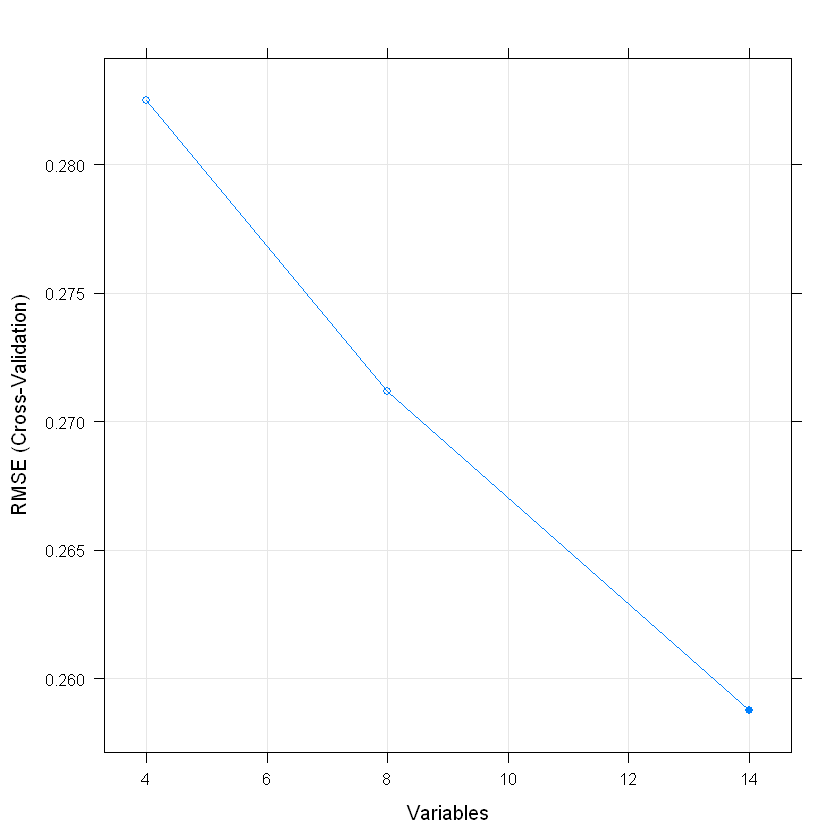

In [57]:
plot(resultsmll, type=c("g", "o"))

## 3. Classificação e seleção de atributos com base no algoritmo de random forest

In [58]:
# Biblioteca(s) Necessária(s)
library(Boruta)

Warning message:
"package 'Boruta' was built under R version 3.6.3"

In [59]:
# Objeto de armazenamento dos resultados
smllboruta_output <- Boruta(direction ~., data = z, doTrace = 0)
names(smllboruta_output)

[1] "finalDecision" "ImpHistory"    "pValue"        "maxRuns"      
 [5] "light"         "mcAdj"         "timeTaken"     "roughfixed"   
 [9] "call"          "impSource"

In [60]:
# Obtenção das variáveis de significância
smllboruta_signif <- getSelectedAttributes(smllboruta_output, withTentative = TRUE)
print(smllboruta_signif)

 [1] "close"      "avg10"      "avg20"      "std10"      "std20"     
 [6] "rsi14"      "rsi5"       "macd1226"   "signal9"    "histogram9"
[11] "macd0720"   "signal5"    "histogram5" "bbands"    


In [61]:
# Correção preliminar
smllroughfixmod <- TentativeRoughFix(smllboruta_output)
smllboruta_signif2 <- getSelectedAttributes(smllroughfixmod)
print(smllboruta_signif2)

Warning message in TentativeRoughFix(smllboruta_output):
"There are no Tentative attributes! Returning original object."

 [1] "close"      "avg10"      "avg20"      "std10"      "std20"     
 [6] "rsi14"      "rsi5"       "macd1226"   "signal9"    "histogram9"
[11] "macd0720"   "signal5"    "histogram5" "bbands"    


In [62]:
# Score de importância das variáveis
smllboruta_imp <- attStats(smllroughfixmod)
smllboruta_imp2 <- smllboruta_imp[smllboruta_imp$decision != 'Rejected', c('meanImp', 'decision')]

# Exibição por ordem decrescente de importância
head(smllboruta_imp2[order(-smllboruta_imp2),])

Warning message in Ops.factor(left):
"'-' not meaningful for factors"

,meanImp,decision
macd0720,41.10740,Confirmed
signal5,37.60644,Confirmed
rsi14,28.90852,Confirmed
macd1226,27.35289,Confirmed
histogram9,26.03384,Confirmed
rsi5,24.50146,Confirmed


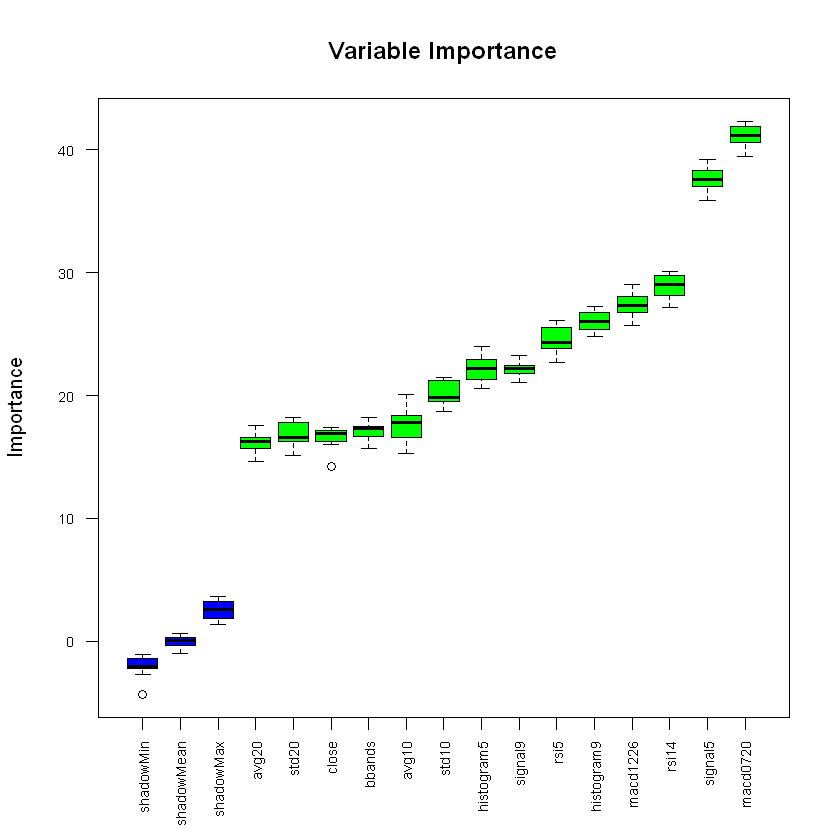

In [63]:
# Análise Gráfica
plot(smllboruta_output, cex.axis=.7, las=2, xlab="", main="Variable Importance")  

Colunas em verde são as variáveis "confirmadas" e as barras em azul representam (ShadowMax e ShadowMin => utilizados no algoritmo para decidir se uma variável é importante ou não).

# Etapa 8: Predição

## 1. Separação dos dados de treino e teste

In [64]:
# Biblioteca(s) Necessária(s)
library(keras)

Warning message:
"package 'keras' was built under R version 3.6.3"

**Dataframe "BVSP"**

In [65]:
# Determinação do tamanho da amostra
smllsplit <- sample(2, nrow(smllz), replace=TRUE, prob=c(0.70, 0.30))

# 0.70 de probabilidade dos dados como de treino e com 0.30 de probabilidade dos dados como de teste

In [66]:
# Separação das amostras (índice 1 = treino e indice 2 = teste)
smlltrain <- smllz[smllsplit == 1,]
smlltest <- smllz[smllsplit == 2,]

In [67]:
dim(smllz)
dim(smlltrain)
dim(smlltest)

[1] 3784   17

[1] 2663   17

[1] 1121   17

## 2. Regressão Logística

In [68]:
# Criação de uma fórmula que tem "Direction" como variável dependente e todas as demais como variáveis independentes
formula <- paste("direction ~.", sep = "")

**Construção do modelo**

In [69]:
# Utilização de um modelo linear generalizado para ajustar o modelo
smllmodel <- glm(formula, smlltrain[,-17], family = binomial)

summary(smllmodel) 

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = formula, family = binomial, data = smlltrain[, 
    -17])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.8353  -0.1646   0.0048   0.2115   3.4530  

Coefficients: (2 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.789e+01  1.112e+03   0.052   0.9585    
data        -7.752e-11  8.993e-10  -0.086   0.9313    
close        1.045e+02  8.855e+00  11.804  < 2e-16 ***
avg10       -2.004e+01  9.677e+00  -2.071   0.0384 *  
avg20       -8.487e+01  9.599e+00  -8.842  < 2e-16 ***
std10        6.886e+00  8.477e+00   0.812   0.4166    
std20        1.509e+01  8.723e+00   1.730   0.0837 .  
rsi14       -4.169e+01  7.048e+00  -5.915 3.31e-09 ***
rsi5         1.125e+01  2.693e+00   4.177 2.96e-05 ***
macd1226    -2.578e+02  2.119e+03  -0.122   0.9031    
signal9      1.368e+02  2.119e+03   0.065   0.9485    
histogram9   5.721e+01  2.119e+03   0.027   0.9785    
macd0720    -2.933e+02  4.986e+01  -

In [70]:
# Ajustamento dos valores no mesmo conjunto de dados utilizados para estimar o valor melhor ajustado.
smllpred <- predict(smllmodel, smlltrain[,-17])

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

**Conversão dos valores ajustados em probabilidade**

In [71]:
# Conversão do output em uma forma probabilistica, que estará no intervalo [0,1]
smllprob <- 1 / (1+exp(-(smllpred)))

head(smllprob)   

1            2            3            4            5            7 
6.222241e-32 4.934731e-16 1.364434e-11 2.165850e-08 1.350572e-06 5.126189e-03

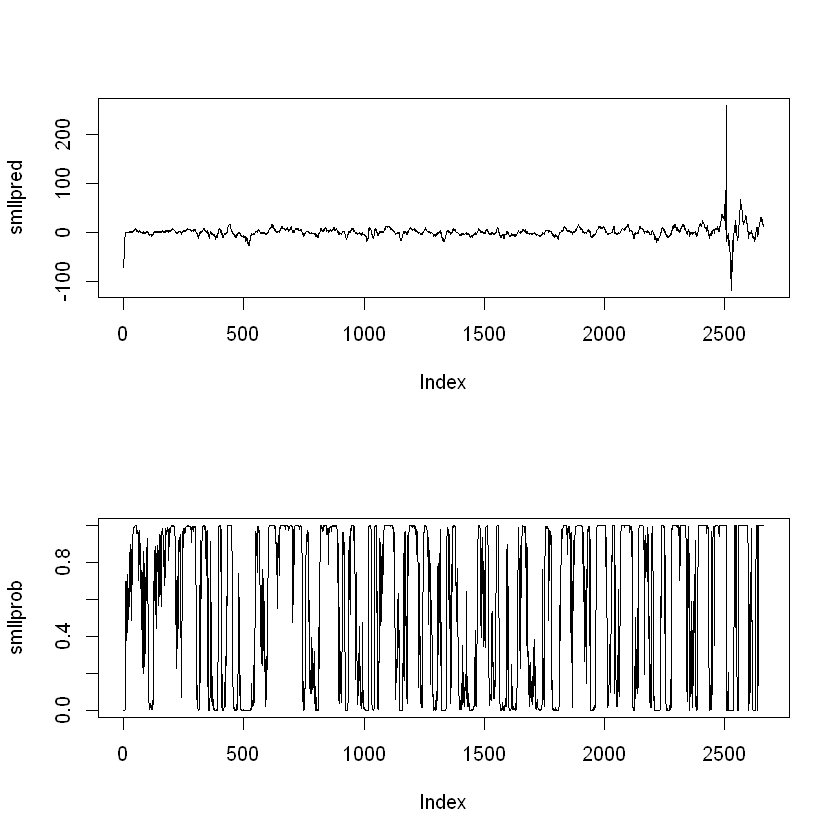

In [72]:
# Análise gráfica
par(mfrow = c(2,1))              

# Figura 1: previsão do modelo
plot(smllpred, type = "l")           

# Figura 2: probabilidade do modelo
plot(smllprob, type = "l")

**Classificação das probabilidades em 2 classes (1 = direção "Up" e 0 = direção "Down")**

In [73]:
smllpred_directionin <- NULL

# Direção para cima (Up)
smllpred_directionin[smllprob > 0.5] <- 1    

# Direção para baixo (Down)
smllpred_directionin[smllprob <= 0.5] <- 0

**Verificação da acurácia do modelo**

In [74]:
# Biblioteca(s) Necessária(s)
library(caret)
library(e1071)

Warning message:
"package 'e1071' was built under R version 3.6.3"
Attaching package: 'e1071'

The following objects are masked from 'package:moments':

    kurtosis, moment, skewness



In [75]:
# Matriz de Confusão
confusionMatrix(table(smllpred_directionin, smlltrain$direction))

Confusion Matrix and Statistics

                    
smllpred_directionin    0    1
                   0  988  107
                   1  128 1440
                                          
               Accuracy : 0.9118          
                 95% CI : (0.9003, 0.9223)
    No Information Rate : 0.5809          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8183          
                                          
 Mcnemar's Test P-Value : 0.192           
                                          
            Sensitivity : 0.8853          
            Specificity : 0.9308          
         Pos Pred Value : 0.9023          
         Neg Pred Value : 0.9184          
             Prevalence : 0.4191          
         Detection Rate : 0.3710          
   Detection Prevalence : 0.4112          
      Balanced Accuracy : 0.9081          
                                          
       'Positive' Class : 0         

**Curva ROC 1**

In [76]:
# Biblioteca(s) Necessária(s)
library(PRROC)

Warning message:
"package 'PRROC' was built under R version 3.6.3"

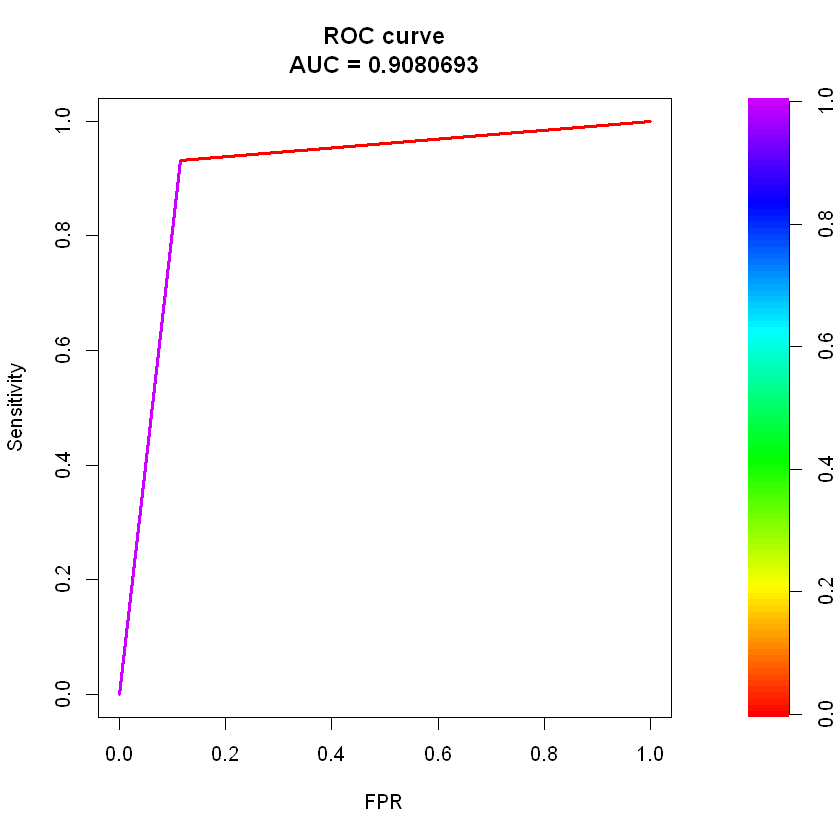

In [77]:
plot(roc.curve(scores.class0 = smllpred_directionin, weights.class0=smlltrain$direction, curve=TRUE))

**Curva ROC 2**

In [78]:
# Biblioteca(s) Necessária(s)
library(precrec)

Warning message:
"package 'precrec' was built under R version 3.6.3"

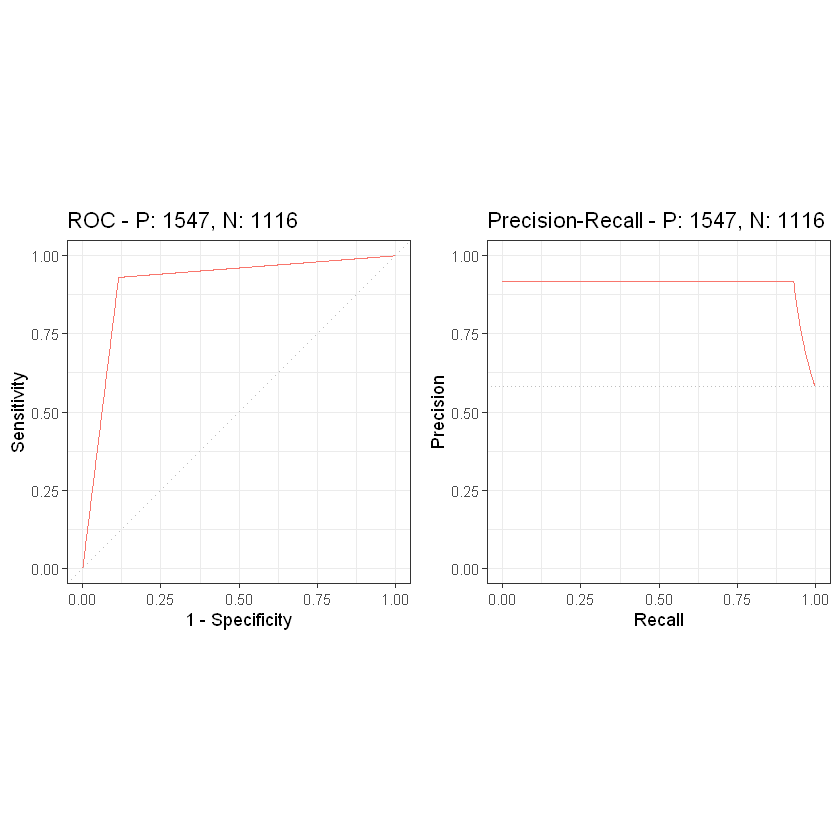

In [79]:
smllprecrecin <- evalmod(scores = smllpred_directionin, labels = smlltrain$direction)
autoplot(smllprecrecin)

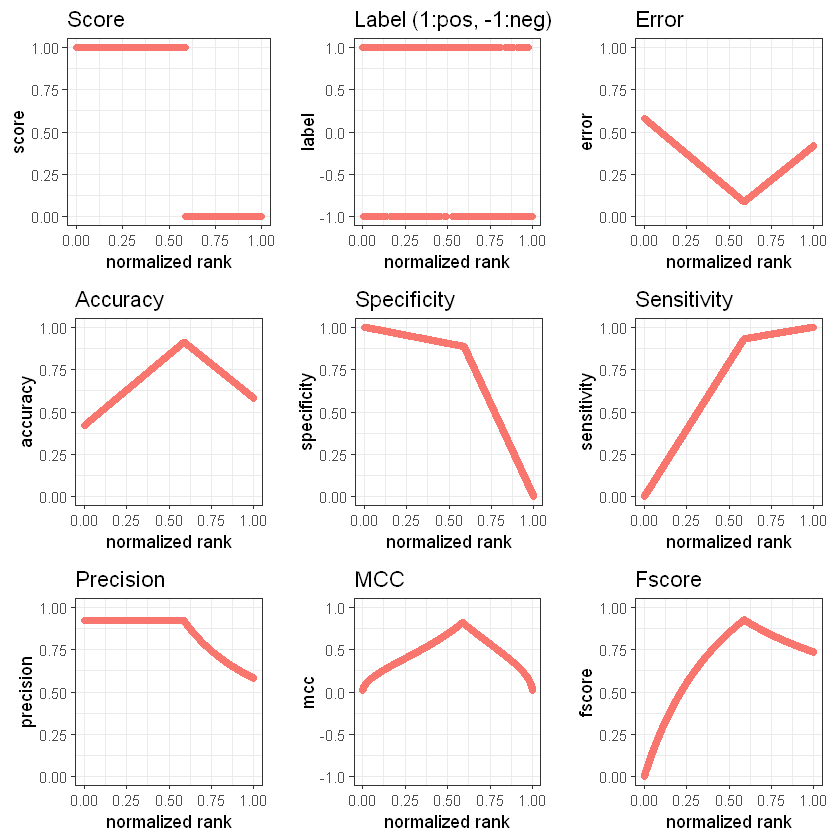

In [80]:
smllprecrecin2 <- evalmod(scores = smllpred_directionin, labels = smlltrain$direction, mode="basic")
autoplot(smllprecrecin2)

**Análise para os dados de teste**

In [81]:
# Ajustamento do modelo
smllpredout <- predict(smllmodel, smlltest[,-17])

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [82]:
# Conversão do output em uma forma probabilistica
smllprobout <- 1 / (1+exp(-(smllpredout)))

head(smllprobout)  

6            8           14           21           23           29 
0.0002089667 0.0669477416 0.5397357770 0.7575099727 0.6487446690 0.7680758563

In [83]:
# Classificação das probabilidades
smllpred_directionout <- NULL

# Direção para cima (Up)
smllpred_directionout[smllprobout > 0.5] <- 1    

# Direção para baixo (Down)
smllpred_directionout[smllprobout <= 0.5] <- 0

In [84]:
# Matriz de Confusão
confusionMatrix(table(smllpred_directionout, smlltest$direction))

Confusion Matrix and Statistics

                     
smllpred_directionout   0   1
                    0 401  55
                    1  58 607
                                          
               Accuracy : 0.8992          
                 95% CI : (0.8801, 0.9162)
    No Information Rate : 0.5905          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7913          
                                          
 Mcnemar's Test P-Value : 0.8508          
                                          
            Sensitivity : 0.8736          
            Specificity : 0.9169          
         Pos Pred Value : 0.8794          
         Neg Pred Value : 0.9128          
             Prevalence : 0.4095          
         Detection Rate : 0.3577          
   Detection Prevalence : 0.4068          
      Balanced Accuracy : 0.8953          
                                          
       'Positive' Class : 0           

**Curva ROC 1**

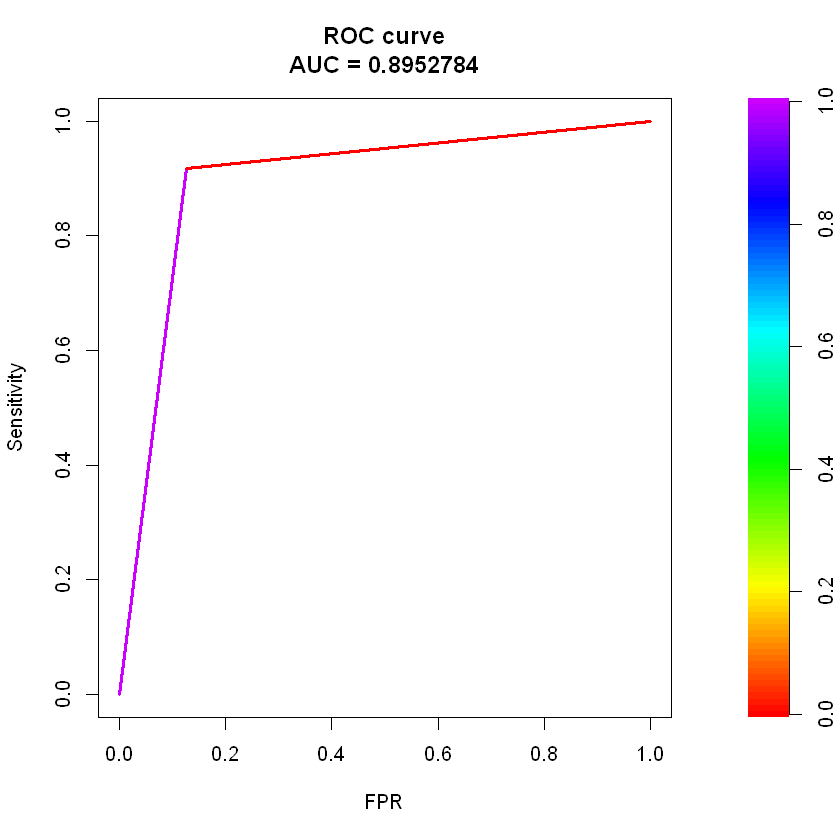

In [85]:
plot(roc.curve(scores.class0 = smllpred_directionout, weights.class0=smlltest$direction, curve=TRUE))

**Curva ROC 2**

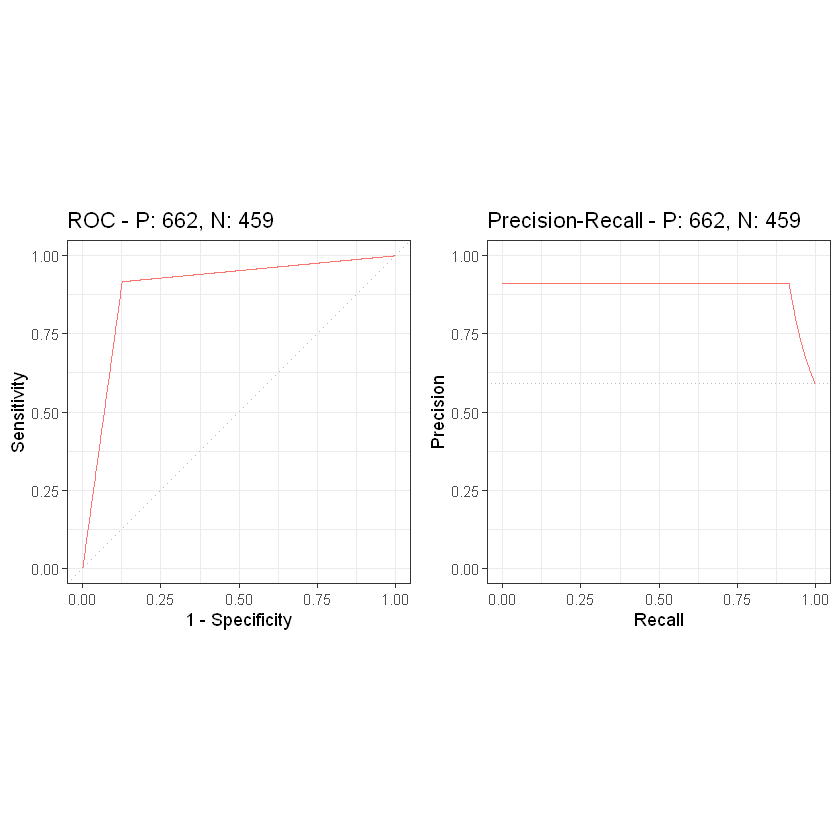

In [86]:
smllprecrecout <- evalmod(scores = smllpred_directionout, labels = smlltest$direction)
autoplot(smllprecrecout)

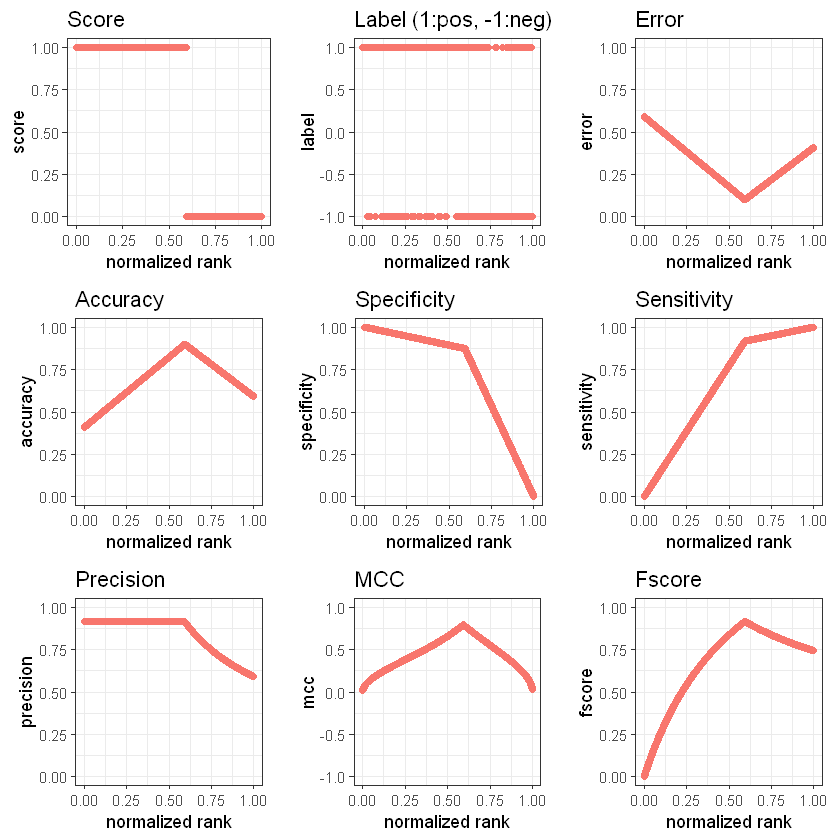

In [87]:
smllprecrecout <- evalmod(scores = smllpred_directionout, labels = smlltest$direction, mode="basic")
autoplot(smllprecrecout)

## 3. Algoritmo K-means

In [88]:
# Definição do número de clusters
cluster <- 2
set.seed(1)

# O número de clusters corresponde ao número de direções (up = 1, down = 0)

**Remoção das colunas de rótulo**

K-means é um algoritmo do tipo não supervisionado (não trabalha com dados rotulados) e os atributos "direction" e "dirret" funcionam como rótulos.

Rótulos não são desejáveis para algorítmos não supervisionados.

In [89]:
smlltrain2 <- smlltrain[,-c(16,17)]
smlltest2 <- smlltest[,-c(16,17)]

**Execução do algoritmo**

In [90]:
smllmodel2 <- kmeans(smlltrain2[,-1], cluster)

head(smllmodel2$cluster)

1 2 3 4 5 7 
2 2 2 2 2 2

In [91]:
# Extração do centróides finais dos cluesters (Centros finais do cluster)
smllmodel2$center

close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands
3.222626,3.202052,3.182101,-0.4527194,-0.4196081,-0.4219727,-0.422699,-0.4992893,-0.4981522,-0.5250833,-0.5011277,-0.5005797,-0.5255880,-0.1033126
1.423314,1.420512,1.417822,-0.4939850,-0.4807382,-0.4302400,-0.426337,-0.5193954,-0.5197254,-0.5248797,-0.5208816,-0.5208840,-0.5250376,-0.3478332


In [92]:
# Extração do número de pontos de dados de cada cluster    
smllmodel2$size

[1]  471 2192

**Verificação da acurácia do modelo**

In [93]:
# Cálculo da soma dos quadrados entre clusters
round(smllmodel2$tot.withinss, digits = 2)

[1] 2472.81

In [94]:
# Cálculo da soma total dos quadrados
round(smllmodel2$totss, digits = 2)

[1] 6191.22

In [95]:
# Acurácia = Soma dos quadrados entre os Clusters / Soma Total dos quadrados 
round(smllmodel2$tot.withinss/smllmodel2$totss, digits = 2)

[1] 0.4

A acurácia do modelo não é satisfatória.

**Previsão**

In [96]:
# Biblioteca(s) Necessária(s)
library(clue)

Warning message:
"package 'clue' was built under R version 3.6.3"

In [97]:
smllpredkm <- cl_predict(smllmodel2, smlltest2[,-1])
head(smllpredkm)

[1] 2 2 2 2 2 2

# 4. Árvore de decisão

In [98]:
# Biblioteca(s) Necessária(s)
library(rpart) 
library(rpart.plot)

Warning message:
"package 'rpart.plot' was built under R version 3.6.3"

In [99]:
# Criação da árvore de decisão
smllmodel3 <- rpart(formula, smlltrain, method = "class")

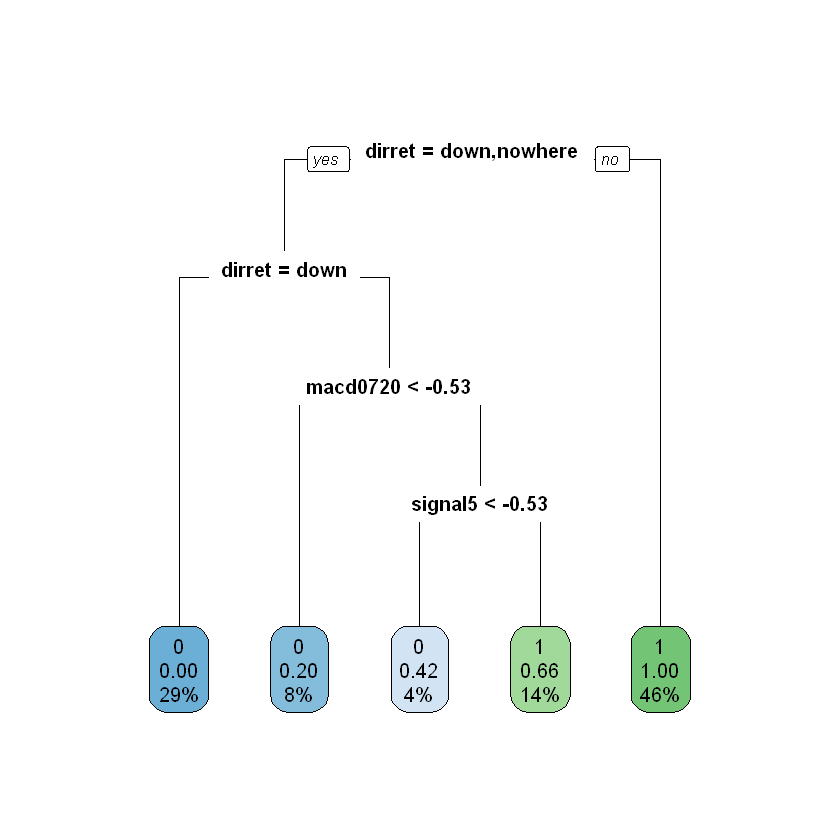

In [100]:
# Criação da árvore gráfica
rpart.plot(smllmodel3, type = 0, extra = 106, tweak = 1) 

In [101]:
# Importância dos atributos
smllimp <- varImp(smllmodel3, scale = F)
smllimp

,Overall
close,3.962992
dirret,963.922155
macd0720,972.587063
macd1226,863.942262
rsi14,554.525902
signal5,929.847785
signal9,106.711825
data,0.000000
avg10,0.000000
avg20,0.000000


In [102]:
# Previsão
smllpred <- predict(smllmodel3, smlltest, type = "class")

In [103]:
# Matriz de Confusão
confusionMatrix(table(smllpred, smlltest$direction)) 

Confusion Matrix and Statistics

        
smllpred   0   1
       0 392  40
       1  67 622
                                          
               Accuracy : 0.9045          
                 95% CI : (0.8858, 0.9211)
    No Information Rate : 0.5905          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8008          
                                          
 Mcnemar's Test P-Value : 0.01195         
                                          
            Sensitivity : 0.8540          
            Specificity : 0.9396          
         Pos Pred Value : 0.9074          
         Neg Pred Value : 0.9028          
             Prevalence : 0.4095          
         Detection Rate : 0.3497          
   Detection Prevalence : 0.3854          
      Balanced Accuracy : 0.8968          
                                          
       'Positive' Class : 0               
                                          

## 5. K Nearest Neighborhood

In [104]:
# Biblioteca(s) Necessária(s)
library(class)

In [105]:
# Definição do número de Neighborhoods    
neighborhood <- 3

# O número de neighborhoods corresponde ao número de direções (Up, Down, NoWhere)

set.seed(1)

isdir <- smlltrain$dirret

In [106]:
smllmodel4 <- knn(smlltrain2[,-1], smlltest2[,-1], isdir, neighborhood)
head(smllmodel4)

[1] down    down    nowhere up      up      up     
Levels: down nowhere up

In [107]:
summary(smllmodel4)

down nowhere      up 
    310     293     518

In [108]:
# Matriz de Confusão
confusionMatrix(table(smllmodel4, smlltest$dirret)) 

Confusion Matrix and Statistics

          
smllmodel4 down nowhere  up
   down     263      42   5
   nowhere   38     202  53
   up         5      46 467

Overall Statistics
                                          
               Accuracy : 0.8314          
                 95% CI : (0.8082, 0.8529)
    No Information Rate : 0.4683          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7368          
                                          
 Mcnemar's Test P-Value : 0.8744          

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity               0.8595         0.6966    0.8895
Specificity               0.9423         0.8905    0.9144
Pos Pred Value            0.8484         0.6894    0.9015
Neg Pred Value            0.9470         0.8937    0.9038
Prevalence                0.2730         0.2587    0.4683
Detection Rate            0.2346         0.1802    0.4166
Detectio

## 6. Support Vector Machine

In [109]:
smllmodel5 <- svm(smlltrain2[,-1], as.factor(isdir))
head(smllmodel5)

$call
svm.default(x = smlltrain2[, -1], y = as.factor(isdir))

$type
[1] 0

$kernel
[1] 2

$cost
[1] 1

$degree
[1] 3

$gamma
[1] 0.07142857


In [110]:
smllpredsvm <- predict(smllmodel5, smlltest2[,-1])
head(smllpredsvm)

6       8      14      21      23      29 
   down    down nowhere      up      up      up 
Levels: down nowhere up

In [111]:
# Matriz de Confusão
confusionMatrix(table(smllpredsvm, smlltest$dirret)) 

Confusion Matrix and Statistics

           
smllpredsvm down nowhere  up
    down     267      40   4
    nowhere   32     197  51
    up         7      53 470

Overall Statistics
                                        
               Accuracy : 0.8332        
                 95% CI : (0.81, 0.8546)
    No Information Rate : 0.4683        
    P-Value [Acc > NIR] : <2e-16        
                                        
                  Kappa : 0.7386        
                                        
 Mcnemar's Test P-Value : 0.6269        

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity               0.8725         0.6793    0.8952
Specificity               0.9460         0.9001    0.8993
Pos Pred Value            0.8585         0.7036    0.8868
Neg Pred Value            0.9519         0.8894    0.9069
Prevalence                0.2730         0.2587    0.4683
Detection Rate            0.2382         0.1757    0.4193
Detection Prevalence 

## 7. Regressão Linear

In [112]:
# Construção do modelo
smlllm.fit = lm(close ~ avg10 + avg20 + std10 + std20 + rsi14 + rsi5 + macd1226 + signal9 +
                  histogram9 + macd0720 + signal5 + histogram5 + bbands, data = smllz)

summary(smlllm.fit)


Call:
lm(formula = close ~ avg10 + avg20 + std10 + std20 + rsi14 + 
    rsi5 + macd1226 + signal9 + histogram9 + macd0720 + signal5 + 
    histogram5 + bbands, data = smllz)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2468 -0.0072 -0.0008  0.0067  1.6108 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.58500    0.24852   2.354   0.0186 *  
avg10        0.51672    0.01465  35.275  < 2e-16 ***
avg20        0.48266    0.01468  32.872  < 2e-16 ***
std10       -0.05810    0.05736  -1.013   0.3112    
std20       -0.01709    0.03838  -0.445   0.6562    
rsi14        0.06854    0.05449   1.258   0.2086    
rsi5         0.04123    0.03371   1.223   0.2214    
macd1226    -0.94720    0.11603  -8.163 4.40e-16 ***
signal9      0.89550    0.08392  10.670  < 2e-16 ***
histogram9   0.67809    0.14062   4.822 1.48e-06 ***
macd0720     5.44402    0.47584  11.441  < 2e-16 ***
signal5     -4.39082    0.48563  -9.042

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produzidos"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produzidos"

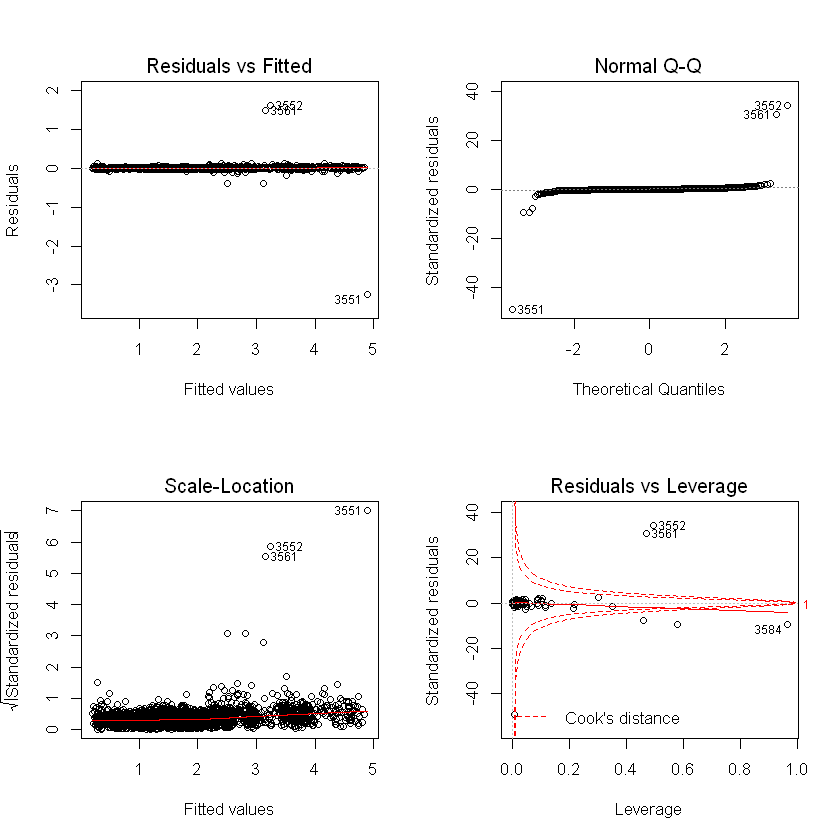

In [113]:
# Análise Gráfica
par(mfrow=c(2,2))
plot(smlllm.fit)

In [114]:
# Previsão
smllrlm <- predict(smlllm.fit, smlltest)

Warning message in predict.lm(smlllm.fit, smlltest):
"prediction from a rank-deficient fit may be misleading"

In [115]:
# Significância do modelo
anova(smlllm.fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
avg10,1,2.867252e+03,2.867252e+03,6.529571e+05,0.000000e+00
avg20,1,1.653103e-01,1.653103e-01,3.764598e+01,9.357804e-10
std10,1,2.506172e+00,2.506172e+00,5.707285e+02,1.410523e-117
std20,1,1.590587e-01,1.590587e-01,3.622231e+01,1.928452e-09
rsi14,1,7.594408e+00,7.594408e+00,1.729469e+03,1.777707e-311
rsi5,1,2.159889e+00,2.159889e+00,4.918698e+02,1.539099e-102
macd1226,1,1.038396e+00,1.038396e+00,2.364730e+02,8.369016e-52
signal9,1,1.208250e+00,1.208250e+00,2.751539e+02,1.062176e-59
histogram9,1,3.303494e+00,3.303494e+00,7.523021e+02,3.547399e-151
macd0720,1,2.189254e+00,2.189254e+00,4.985571e+02,7.963767e-104


In [116]:
# Cálculo da importância das variáveis no modelo
round(varImp(smlllm.fit, scale = TRUE), digits = 2)

,Overall
avg10,35.28
avg20,32.87
std10,1.01
std20,0.45
rsi14,1.26
rsi5,1.22
macd1226,8.16
signal9,10.67
histogram9,4.82
macd0720,11.44


**Métricas de Avaliação**

In [117]:
# Biblioteca(s) Necessária(s)
library(Metrics)

Warning message:
"package 'Metrics' was built under R version 3.6.3"
Attaching package: 'Metrics'

The following object is masked from 'package:precrec':

    auc

The following objects are masked from 'package:caret':

    precision, recall



In [118]:
# Root Mean Squared Error
round(rmse(smlltest$close, smllrlm), digits = 2)

[1] 0.1

In [119]:
# Mean Absolute Error
round(mae(smlltest$close, smllrlm), digits = 2)

[1] 0.01

In [120]:
# Mean Squared Error
round(mse(smlltest$close, smllrlm), digits = 2)

[1] 0.01

In [121]:
# Mean Absolute Percent Error
round(mape(smlltest$close, smllrlm), digits = 2)

[1] 0.01

In [122]:
# Resumo das métricas de avaliação
round(postResample(pred = smllrlm, obs = smlltest$close), digits = 2)

RMSE Rsquared      MAE 
    0.10     0.99     0.01

**Seleção de modelo mais simples, mas com representatividade semelhante**

In [123]:
# Método Stepwise
step(smlllm.fit, direction = "both")

Start:  AIC=-20527.17
close ~ avg10 + avg20 + std10 + std20 + rsi14 + rsi5 + macd1226 + 
    signal9 + histogram9 + macd0720 + signal5 + histogram5 + 
    bbands


Step:  AIC=-20527.17
close ~ avg10 + avg20 + std10 + std20 + rsi14 + rsi5 + macd1226 + 
    signal9 + histogram9 + macd0720 + signal5 + histogram5

             Df Sum of Sq    RSS    AIC
- std20       1    0.0009 16.560 -20529
- std10       1    0.0045 16.564 -20528
- histogram5  1    0.0065 16.566 -20528
- rsi5        1    0.0066 16.566 -20528
- rsi14       1    0.0069 16.566 -20528
<none>                    16.559 -20527
- histogram9  1    0.1021 16.661 -20506
- macd1226    1    0.2926 16.852 -20463
- signal5     1    0.3590 16.918 -20448
- signal9     1    0.5000 17.059 -20417
- macd0720    1    0.5748 17.134 -20400
- avg20       1    4.7449 21.304 -19576
- avg10       1    5.4642 22.023 -19450

Step:  AIC=-20528.97
close ~ avg10 + avg20 + std10 + rsi14 + rsi5 + macd1226 + signal9 + 
    histogram9 + macd0720 + signal5 +


Call:
lm(formula = close ~ avg10 + avg20 + std10 + rsi5 + macd1226 + 
    signal9 + histogram9 + macd0720 + signal5, data = smllz)

Coefficients:
(Intercept)        avg10        avg20        std10         rsi5     macd1226  
    0.86701      0.51741      0.48165     -0.07091      0.05430     -0.94896  
    signal9   histogram9     macd0720      signal5  
    0.87566      0.64194      4.91200     -3.81076  


In [124]:
# Método backward
step(smlllm.fit, direction = "backward")

Start:  AIC=-20527.17
close ~ avg10 + avg20 + std10 + std20 + rsi14 + rsi5 + macd1226 + 
    signal9 + histogram9 + macd0720 + signal5 + histogram5 + 
    bbands


Step:  AIC=-20527.17
close ~ avg10 + avg20 + std10 + std20 + rsi14 + rsi5 + macd1226 + 
    signal9 + histogram9 + macd0720 + signal5 + histogram5

             Df Sum of Sq    RSS    AIC
- std20       1    0.0009 16.560 -20529
- std10       1    0.0045 16.564 -20528
- histogram5  1    0.0065 16.566 -20528
- rsi5        1    0.0066 16.566 -20528
- rsi14       1    0.0069 16.566 -20528
<none>                    16.559 -20527
- histogram9  1    0.1021 16.661 -20506
- macd1226    1    0.2926 16.852 -20463
- signal5     1    0.3590 16.918 -20448
- signal9     1    0.5000 17.059 -20417
- macd0720    1    0.5748 17.134 -20400
- avg20       1    4.7449 21.304 -19576
- avg10       1    5.4642 22.023 -19450

Step:  AIC=-20528.97
close ~ avg10 + avg20 + std10 + rsi14 + rsi5 + macd1226 + signal9 + 
    histogram9 + macd0720 + signal5 +


Call:
lm(formula = close ~ avg10 + avg20 + std10 + rsi5 + macd1226 + 
    signal9 + histogram9 + macd0720 + signal5, data = smllz)

Coefficients:
(Intercept)        avg10        avg20        std10         rsi5     macd1226  
    0.86701      0.51741      0.48165     -0.07091      0.05430     -0.94896  
    signal9   histogram9     macd0720      signal5  
    0.87566      0.64194      4.91200     -3.81076  


In [125]:
# Método Forward
step(smlllm.fit, direction = "forward")

Start:  AIC=-20527.17
close ~ avg10 + avg20 + std10 + std20 + rsi14 + rsi5 + macd1226 + 
    signal9 + histogram9 + macd0720 + signal5 + histogram5 + 
    bbands




Call:
lm(formula = close ~ avg10 + avg20 + std10 + std20 + rsi14 + 
    rsi5 + macd1226 + signal9 + histogram9 + macd0720 + signal5 + 
    histogram5 + bbands, data = smllz)

Coefficients:
(Intercept)        avg10        avg20        std10        std20        rsi14  
    0.58500      0.51672      0.48266     -0.05810     -0.01709      0.06854  
       rsi5     macd1226      signal9   histogram9     macd0720      signal5  
    0.04123     -0.94720      0.89550      0.67809      5.44402     -4.39082  
 histogram5       bbands  
   -0.58802           NA  
